<a href="https://colab.research.google.com/github/soaresbru/Clusterizacao-Lojas/blob/main/Notebook_Projeto_Final_Grupo_Delta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Grupo Delta</center>
# <center>Case - A-TECH</center>
___

Neste notebook serão realizadas as principais etapas para realizar as análises dos dados disponíveis e propor soluções para A-TECH, com base em clusterização. 

## Conteúdo
1. Leitura das bases consumidas
2. Análise dos dados
3. Construção da base de dados para clusterização
4. Clusterização
5. Entendimento dos clusters
6. Análise de outras variáveis

## 1. Leitura das Bases

Nesta etapa, a base de dados para análise serão carregados



In [ ]:
# Importando as bibliotecas padrões
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando a biblioteca para carregar arquivos do drive
from google.colab import drive

# Importando a biblioteca para a clusterização
from sklearn.cluster import KMeans

# Importando a biblioteca para fazer a normalização
from sklearn.preprocessing import StandardScaler

# Importando a biblioteca para fazer a decomposição em trend, seasonal e resid
from statsmodels.tsa.seasonal import seasonal_decompose

# Importando bibliotecas para realização de gráficos
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# Montando Google Drive
drive.mount('/content/drive')

# Caminho para pegar os arquivos do drive
#caminho = '/content/drive/MyDrive/Curso Ciência de Dados - Americanas VAI/1663622551_Projeto Final/'                         # Bruno
#caminho = '/content/drive/MyDrive/VAI Academy & Americanas SA/03 - Capacitação em Ciência de Dados/CASE FINAL/base_dados/'  # Jhonata
caminho = '/content/drive/MyDrive/curso/'          #ramon

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lendo o arquivo de dados
df_lojas = pd.read_csv(caminho+"lojas.csv")
df_outras_variaveis = pd.read_csv(caminho+"outras_variaveis.csv")
df_vendas = pd.read_csv(caminho+'vendas.csv')

## 2. Análise dos dados

Nesta etapa o objetivo é conhecer melhor os nossos dados para facilitar no entendimento do problema e na tomada de decisão

In [ ]:
# Olhando as primeiras linhas do arquivo loja
df_lojas.head()
# Lembrando que a unidade do tamanho da loja é em Square Feet,  M² = 10,764 sq.ft

loja tipo_de_loja     tamanho
0     1            A   97.622581
1     2            A  130.520645
2     3            B   24.123871
3     4            A  132.814839
4     5            B   22.500000

In [ ]:
# olhando algumas informações como o tipo de cada coluna e dados nulos
df_lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loja          45 non-null     int64  
 1   tipo_de_loja  45 non-null     object 
 2   tamanho       45 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
# Olhando as primeiras linhas do arquivo outras variáveis
df_outras_variaveis.head()

loja        data  preco_combustivel         IPC  taxa_desemprego  evento
0     1  2010-02-05              2.572  211.096358            8.106   False
1     1  2010-02-12              2.548  211.242170            8.106    True
2     1  2010-02-19              2.514  211.289143            8.106   False
3     1  2010-02-26              2.561  211.319643            8.106   False
4     1  2010-03-05              2.625  211.350143            8.106   False

In [ ]:
# olhando algumas informações como o tipo de cada coluna e dados nulos
df_outras_variaveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loja               8190 non-null   int64  
 1   data               8190 non-null   object 
 2   preco_combustivel  8190 non-null   float64
 3   IPC                7605 non-null   float64
 4   taxa_desemprego    7605 non-null   float64
 5   evento             8190 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 328.0+ KB


In [ ]:
# a data está em tipo objeto, queremos transformar em datetime
df_outras_variaveis['data'] =  pd.to_datetime(df_outras_variaveis['data'])

In [ ]:
# Olhando as primeiras linhas do arquivo
df_vendas.head()

loja  departamento        data  venda_semanal  semana_de_evento
0     1             1  05/02/2010       24924.50             False
1     1             1  12/02/2010       46039.49              True
2     1             1  19/02/2010       41595.55             False
3     1             1  26/02/2010       19403.54             False
4     1             1  05/03/2010       21827.90             False

In [ ]:
# olhando algumas informações como o tipo de cada coluna e dados nulos
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loja              421570 non-null  int64  
 1   departamento      421570 non-null  int64  
 2   data              421570 non-null  object 
 3   venda_semanal     421570 non-null  float64
 4   semana_de_evento  421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
# a data está em tipo objeto, queremos transformar em datetime
df_vendas['data'] =  pd.to_datetime(df_vendas['data'], format="%d/%m/%Y")
df_vendas['data'] = pd.to_datetime(df_vendas['data']).dt.strftime('%Y-%m-%d')
df_vendas['data'] =  pd.to_datetime(df_vendas['data'])

In [ ]:
# Adicionando colunas, com base nas datas, ao dataframe que podem ser utilizadas posteriormente
df_vendas['ano'] = df_vendas['data'].dt.year
df_vendas['mes'] = df_vendas['data'].dt.month
df_vendas['semana'] = df_vendas['data'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
# juntando os arquivos
juntos = pd.merge(df_vendas, df_lojas, on='loja', how='left')
df_juntos= pd.merge(juntos, df_outras_variaveis, on=['loja', 'data'], how='left')

# Olhando as primeiras linhas do arquivo 
df_juntos.head()

loja  departamento       data  venda_semanal  semana_de_evento   ano  mes  \
0     1             1 2010-02-05       24924.50             False  2010    2   
1     1             1 2010-02-12       46039.49              True  2010    2   
2     1             1 2010-02-19       41595.55             False  2010    2   
3     1             1 2010-02-26       19403.54             False  2010    2   
4     1             1 2010-03-05       21827.90             False  2010    3   

   semana tipo_de_loja    tamanho  preco_combustivel         IPC  \
0       5            A  97.622581              2.572  211.096358   
1       6            A  97.622581              2.548  211.242170   
2       7            A  97.622581              2.514  211.289143   
3       8            A  97.622581              2.561  211.319643   
4       9            A  97.622581              2.625  211.350143   

   taxa_desemprego  evento  
0            8.106   False  
1            8.106    True  
2            8.106   False  
3            8.106   False  
4            8.106   False

In [ ]:
# olhando algumas informações como o tipo de cada coluna e dados nulos
df_juntos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   loja               421570 non-null  int64         
 1   departamento       421570 non-null  int64         
 2   data               421570 non-null  datetime64[ns]
 3   venda_semanal      421570 non-null  float64       
 4   semana_de_evento   421570 non-null  bool          
 5   ano                421570 non-null  int64         
 6   mes                421570 non-null  int64         
 7   semana             421570 non-null  int64         
 8   tipo_de_loja       421570 non-null  object        
 9   tamanho            421570 non-null  float64       
 10  preco_combustivel  421570 non-null  float64       
 11  IPC                421570 non-null  float64       
 12  taxa_desemprego    421570 non-null  float64       
 13  evento             421570 non-null  bool    

In [ ]:
# Olhando se as duas colunas de eventos são iguais ou houve algum erro

print(df_juntos['semana_de_evento'].value_counts().sort_values(ascending=False))
semana_evento = df_juntos[df_juntos['semana_de_evento']==1]
se = semana_evento['data'].unique()
print(se)
print('')

print(df_juntos['evento'].value_counts().sort_values(ascending=False))
s_evento = df_juntos[df_juntos['evento']==1]
s = s_evento['data'].unique()
print(s)

False    391909
True      29661
Name: semana_de_evento, dtype: int64
['2010-02-12T00:00:00.000000000' '2010-09-10T00:00:00.000000000'
 '2010-11-26T00:00:00.000000000' '2010-12-31T00:00:00.000000000'
 '2011-02-11T00:00:00.000000000' '2011-09-09T00:00:00.000000000'
 '2011-11-25T00:00:00.000000000' '2011-12-30T00:00:00.000000000'
 '2012-02-10T00:00:00.000000000' '2012-09-07T00:00:00.000000000']

False    391909
True      29661
Name: evento, dtype: int64
['2010-02-12T00:00:00.000000000' '2010-09-10T00:00:00.000000000'
 '2010-11-26T00:00:00.000000000' '2010-12-31T00:00:00.000000000'
 '2011-02-11T00:00:00.000000000' '2011-09-09T00:00:00.000000000'
 '2011-11-25T00:00:00.000000000' '2011-12-30T00:00:00.000000000'
 '2012-02-10T00:00:00.000000000' '2012-09-07T00:00:00.000000000']


In [ ]:
# nesse caso podemos eliminar uma delas
df_juntos= df_juntos.drop(['semana_de_evento'], axis=1)

### 2.1 Análise geral
Vamos entender a parte macroeconomica e as vendas ao longo do tempo

In [ ]:
# # olhando algumas informações estatísticas das variáveis numéricas do cenário macro das lojas
df_outras_variaveis.describe()

loja  preco_combustivel          IPC  taxa_desemprego
count  8190.000000        8190.000000  7605.000000      7605.000000
mean     23.000000           3.405992   172.460809         7.826821
std      12.987966           0.431337    39.738346         1.877259
min       1.000000           2.472000   126.064000         3.684000
25%      12.000000           3.041000   132.364839         6.634000
50%      23.000000           3.513000   182.764003         7.806000
75%      34.000000           3.743000   213.932412         8.567000
max      45.000000           4.468000   228.976456        14.313000

In [ ]:
# Pensando na ideia de como funciona a economia, porém ainda sem analisar os dados, é provavel que:
# Os dados de preço_combustivel e IPC tenham alguma relação pois uma variação do preço do combustível pode aumentar a inflação
# A taxa de desemprego afete as vendas, com menos gente desempregada existem mais pessoas para gastar dinheiro em lojas. Com isso também é possível que a inflação aumente

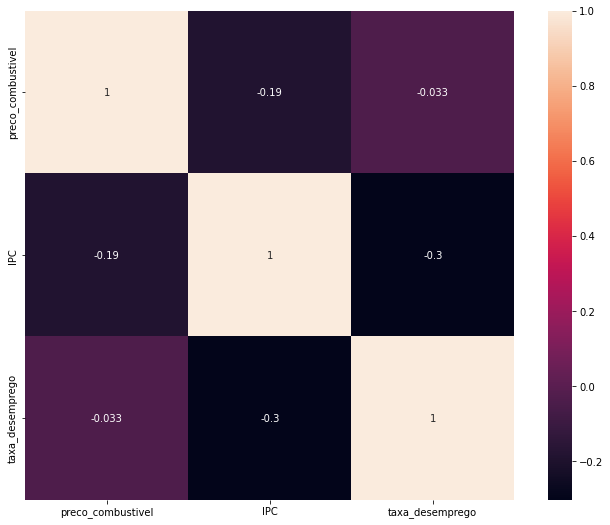

In [ ]:
# Fazendo uma pequena análise de correlação com o gráfico de calor
cor = df_outras_variaveis.drop(['loja', 'evento'], axis=1)
corrmat = cor.corr()
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True);
# IPC e a taxa de desemprego tiveram uma correlação negativa, como esperado
# Mas o IPC e o preço do combustível não tiveram grande correlação, provavelmente o IPC das regiões está sendo mais impactado por outros fatores

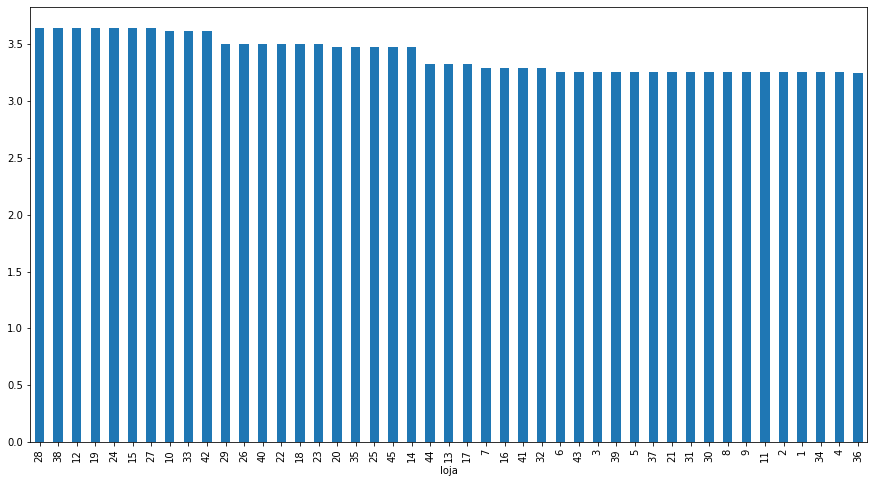

In [ ]:
# vamos ver em média o preço do combustivel da região de cada loja
df_outras_variaveis.groupby(['loja'])['preco_combustivel'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
# Vemos que algumas lojas possuem o preço do combustível da região bem parecido com de outras lojas

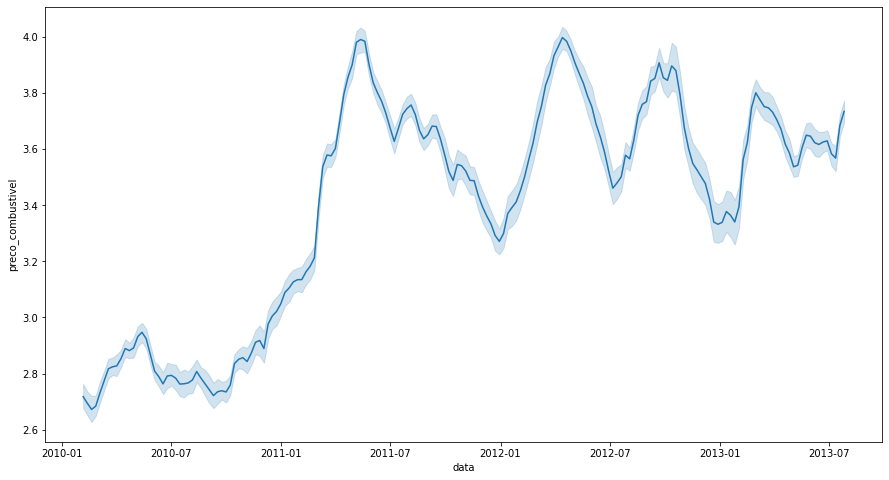

In [ ]:
# Olhando para o preço do combustível ao longo do tempo
plt.subplots(figsize=(15,8))
sns.lineplot(data = df_outras_variaveis, x = df_outras_variaveis['data'], y= df_outras_variaveis['preco_combustivel'])
plt.show()
# O preço de 2010 até 2011 flutuava em torno de 2,8 reais
# Em 2011 em diante tem uma grande elevação e passa a girar em torno de 3,7 reais

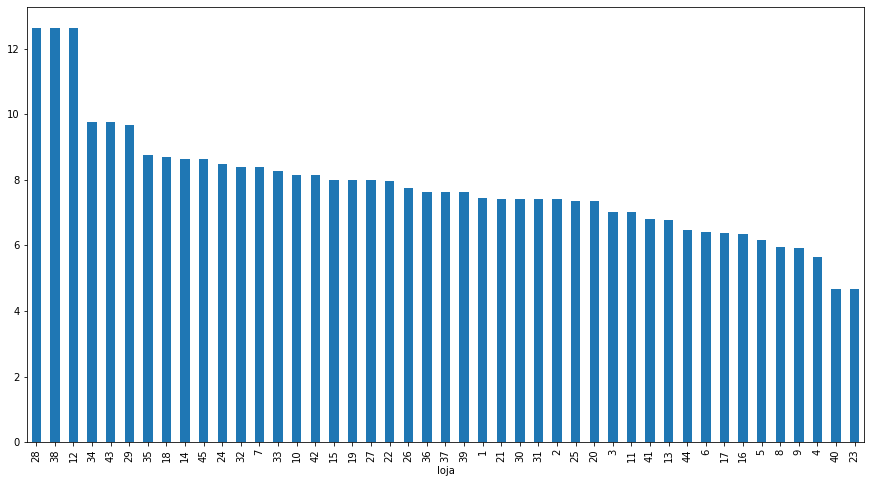

In [ ]:
# vamos ver a média da taxa de desemprego da região de cada loja
df_outras_variaveis.groupby(['loja'])['taxa_desemprego'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))

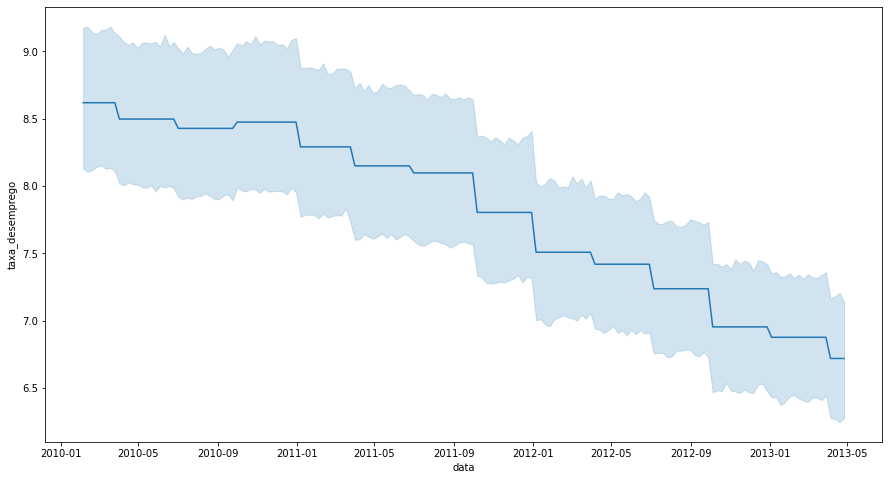

In [ ]:
# Olhando para taxa de desemprego ao longo do tempo
plt.subplots(figsize=(15,8))
sns.lineplot(data = df_outras_variaveis, x = df_outras_variaveis['data'], y= df_outras_variaveis['taxa_desemprego'])
plt.show()
# Observa-se uma queda ao longo do tempo

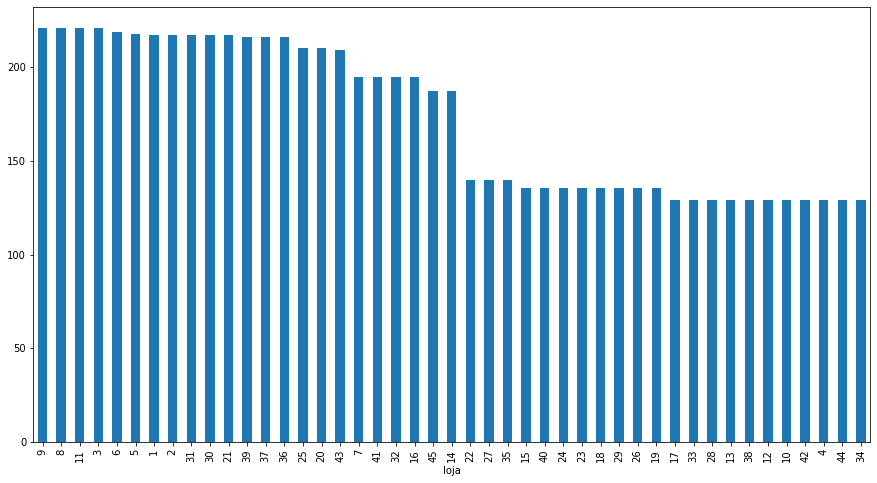

In [ ]:
# vamos ver a média da taxa de inflação da região de cada loja
df_outras_variaveis.groupby(['loja'])['IPC'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))

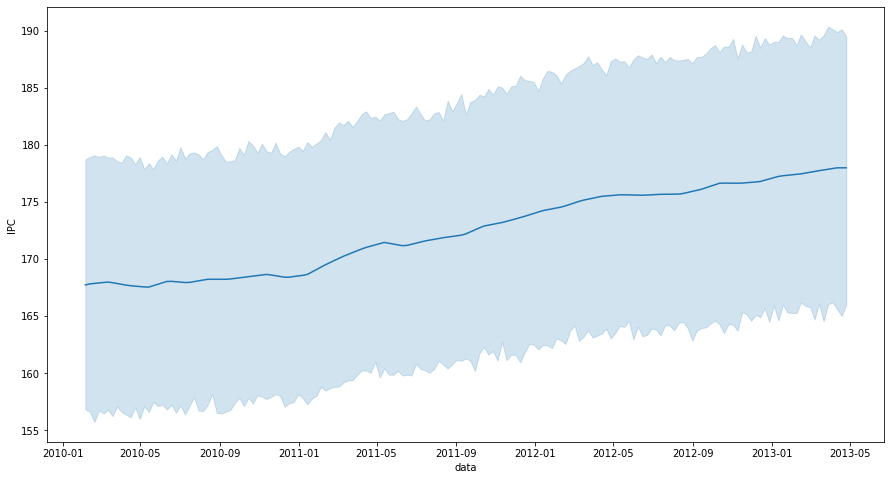

In [ ]:
# Olhando para inflação IPC ao longo do tempo
plt.subplots(figsize=(15,8))
sns.lineplot(data = df_outras_variaveis, x = df_outras_variaveis['data'], y= df_outras_variaveis['IPC'])
plt.show()
# Vemos uma tendência de aumento de inflação

Agora vamos ver as vendas de modo geral

In [ ]:
# Vamos ver quais são as datas em que temos semana de evento 
semana_evento = df_vendas[df_vendas['semana_de_evento']==1]
se = semana_evento['data'].unique()
se

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
# Pelas datas são: Carnaval, feriado de independencia, Black Friday, Natal
# Batendo com o que foi dito 
# Porém em 2011 temos um erro, o carnaval está na data errada está como inicio/meio de fevereiro, mas é início de março

In [ ]:
# Identificar dias bque em geral são bons para o comércio mas que não apareceram na lista de eventos da A-TECH, alguns como:
'''
1 - Páscoa
2 – Dia das Mães. ...
3 – Dia dos namorados. ...
4 – Dia dos Pais. ...
5 – Dia das Crianças. ...
'''
datas_especiais=['2010-04-02', '2010-05-09', '2010-06-12', '2010-08-08', '2010-10-12',
                 '2011-04-22', '2011-05-08', '2011-06-12', '2011-08-14', '2011-10-12',
                 '2012-04-06', '2012-05-13', '2012-06-12', '2012-08-13', '2012-10-12']

In [ ]:
# Transformando as datas identificadas como boas para o comércio em serie, e colacando no fomrato desejado.
data_esp= pd.Series(datas_especiais)
data_esp = pd.to_datetime(data_esp, format="%Y-%m-%d")

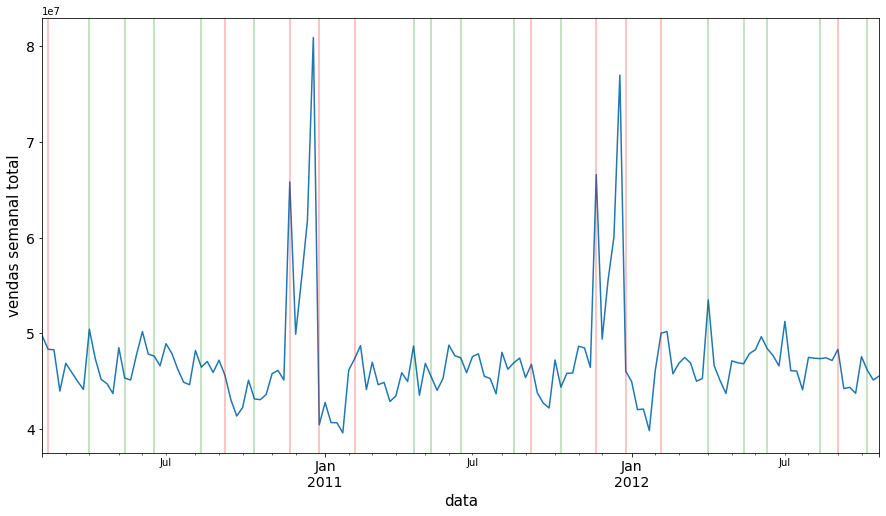

In [ ]:
# Olhando para a venda semanal ao longo do tempo
plt.subplots(figsize=(15,8))


data_grouped = df_juntos.groupby(['data'])['venda_semanal'].sum()
data_grouped.plot()
for i in s:
  plt.axvline(i, alpha=0.3, color='red')

for j in data_esp:
  plt.axvline(j, alpha=0.3, color='g')

plt.xlabel('data',fontsize=15)
plt.ylabel('vendas semanal total',fontsize=15)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

# As linhas vermelhas são as datas de eventos para a A-TECH (Carnaval, feriado de independencia, Black Friday, Natal)
# As linhas verdes são as datas que geralmente são importantes para o comércio (Páscoa, Dia das Mães, Dia dos namorados, Dia dos Pais, Dia das Crianças)

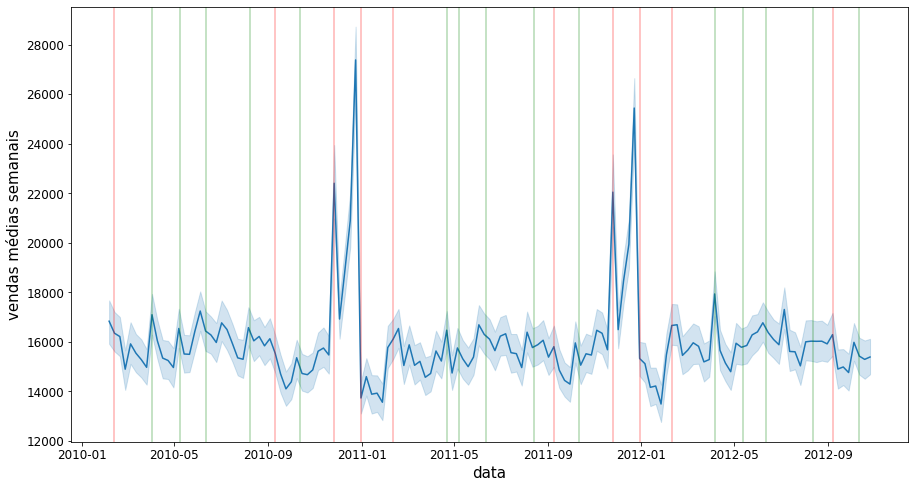

In [ ]:
# Olhando para a venda semanal ao longo do tempo
plt.subplots(figsize=(15,8))
sns.lineplot(data = df_vendas, x = df_vendas['data'], y= df_vendas['venda_semanal'])

for i in se:
  plt.axvline(i, alpha=0.3, color='red')

for j in data_esp:
  plt.axvline(j, alpha=0.3, color='g')

plt.xlabel('data',fontsize=15)
plt.ylabel('vendas médias semanais',fontsize=15)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# As linhas vermelhas são as datas de eventos para a A-TECH (Carnaval, feriado de independencia, Black Friday, Natal)
# As linhas verdes são as datas que geralmente são importantes para o comércio (Páscoa, Dia das Mães, Dia dos namorados, Dia dos Pais, Dia das Crianças)

In [ ]:
# Parece que existe uma data importante em julho na qual não conseguimos identificar, será que aniversário da A-TECH?

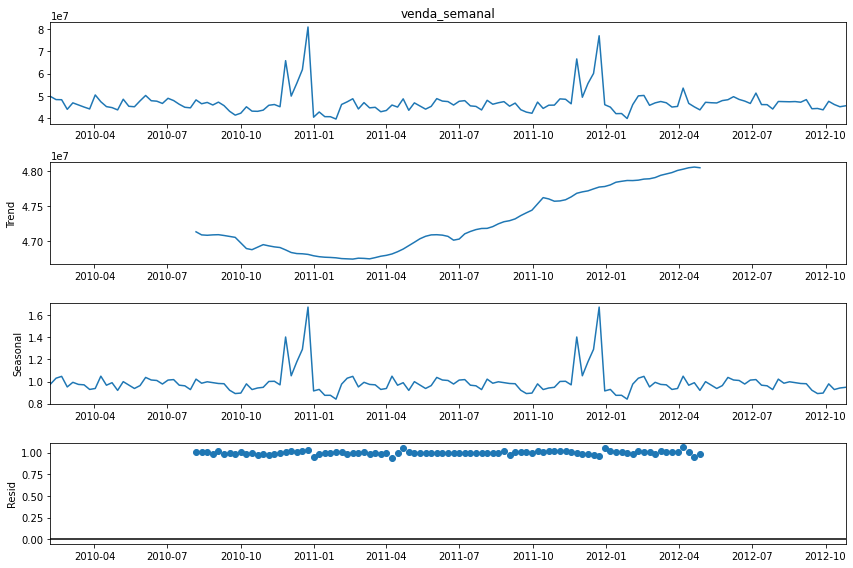

In [ ]:
# Vamos observar a Tendência , Sazonalidade e residuo

decompoe = df_vendas.groupby(['data']).sum()['venda_semanal']
# cria modelo
decomposition = seasonal_decompose(decompoe, model='multiplicative') 
plt.rc("figure",figsize=(12,8))
decomposition.plot()
plt.show()

# Então vemos um tendência de crescimento o que é ótimo para os negócios

### 2.2 Análise das lojas


In [ ]:
# olhando algumas informações do tamanho das lojas como média e mediana
df_lojas['tamanho'].describe()

count     45.000000
mean      84.056516
std       41.177595
min       22.500000
25%       45.621290
50%       81.620645
75%      130.520645
max      141.691613
Name: tamanho, dtype: float64

In [ ]:
# Olhando a quantidade de tipos de lojas
df_lojas['tipo_de_loja'].value_counts().sort_values(ascending=False)
# É possível observar que a maioria é do tipo A e minoria do tipo C

A    22
B    17
C     6
Name: tipo_de_loja, dtype: int64

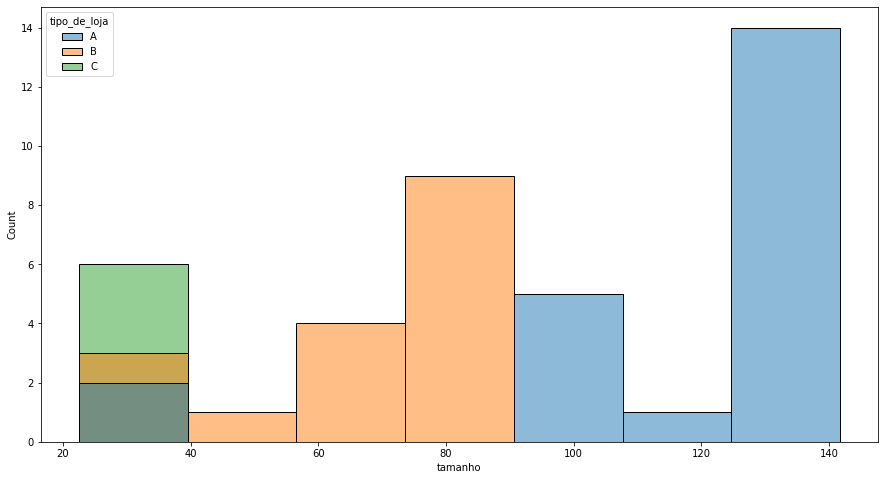

In [ ]:
# Olhando se o tipode loja tem relação com o tamanho
plt.subplots(figsize=(15,8))
sns.histplot(data = df_lojas, x = df_lojas['tamanho'], hue = 'tipo_de_loja')
plt.show()
# Vemos que geralmente os tipos de loja A são maiores, porém existem lojas pequenas do tipo A
# As lojas tipo B são geralmente as lojas médias, 
# e as lojas menores geralmente são C

In [ ]:
# Vemos que existem lojas do tipo A que possuem tamanho de aproximadamente 25
df_lojas[(df_lojas['tipo_de_loja']=="A") & (df_lojas['tamanho']<40)]
# Dessa forma já sabemos que as lojas com esse perfil diferente do tipo A, são as lojas 33 e 36

loja tipo_de_loja    tamanho
32    33            A  25.606452
35    36            A  25.748387

In [ ]:
# Vemos que existem lojas do tipo A que possuem tamanho menor que 37
df_lojas[(df_lojas['tipo_de_loja']=="B") & (df_lojas['tamanho']<40)]
# Dessa forma já sabemos que as lojas com esse perfil diferente do tipo B, são as lojas 3, 5 e 16

loja tipo_de_loja    tamanho
2      3            B  24.123871
4      5            B  22.500000
15    16            B  36.901290

In [ ]:
# Olhando a média de tamanho de cada tipo de loja
df_lojas.groupby(['tipo_de_loja'])['tamanho'].mean().sort_values(ascending=False)
# Vemos que segue o padrão do último gráfico : Loja A geralmente maiores, lojas B geralmente médias e lojas C geralmente menores.

tipo_de_loja
A    114.353372
B     65.284326
C     26.155914
Name: tamanho, dtype: float64

In [ ]:
# Olhando a mediana de tamanho de cada tipo de loja
df_lojas.groupby(['tipo_de_loja'])['tamanho'].median().sort_values(ascending=False)
# Só confirmando o que foi falado anteriormente

tipo_de_loja
A    130.584516
B     73.892258
C     25.748387
Name: tamanho, dtype: float64

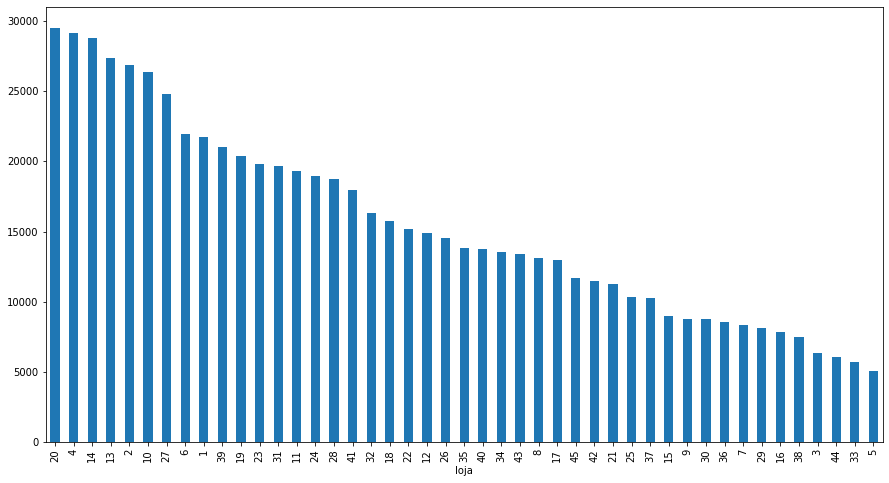

In [ ]:
# vamos ver a média de venda semanal de cada loja
df_vendas.groupby(['loja'])['venda_semanal'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
# Observa-se uma diferença grande das lojas que mais vendem pras que menos vendem

In [ ]:
# Vamos ver a relação da média da venda semanal por tipo de loja 
df_juntos.groupby(['tipo_de_loja'])['venda_semanal'].mean().sort_values(ascending=False)
# Vemos que segue o padrão : Loja A geralmente vendem mais, lojas B geralmente vendas médias e lojas C geralmente vende menos.

tipo_de_loja
A    20099.568043
B    12237.075977
C     9519.532538
Name: venda_semanal, dtype: float64

In [ ]:
# Vamos ver a relação da mediana da venda semanal por tipo de loja 
df_juntos.groupby(['tipo_de_loja'])['venda_semanal'].median().sort_values(ascending=False)
# Vemos que segue o padrão : Loja A geralmente vendem mais, lojas B geralmente vendas médias e lojas C geralmente vende menos.

tipo_de_loja
A    10105.17
B     6187.87
C     1149.67
Name: venda_semanal, dtype: float64

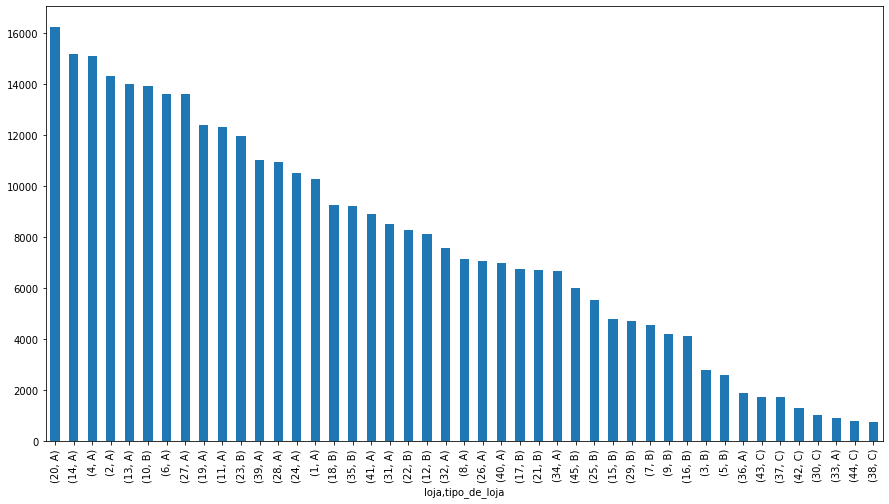

In [ ]:
# Vamos ver a relação da mediana da venda semanal por tipo de loja, colocando a ordem do maior valor de venda pro menor.
df_juntos.groupby(['loja', 'tipo_de_loja'])['venda_semanal'].median().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
# Vemos que segue o padrão : Loja A geralmente vendem mais, lojas B geralmente vendas médias e lojas C geralmente vende menos.

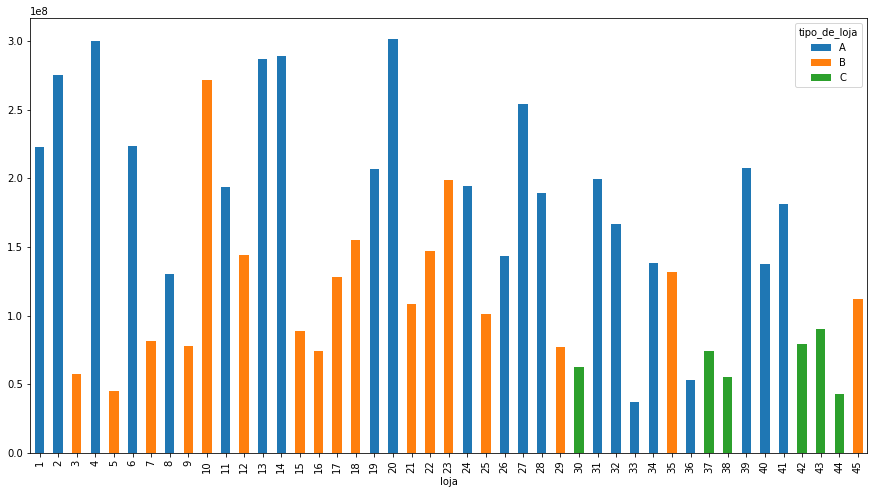

In [ ]:
# Vamos ver a relação da da venda semanal por tipo de loja, colocando a ordem do número da loja
venda_loja = df_juntos.groupby(['loja', 'tipo_de_loja'])['venda_semanal'].sum().unstack('tipo_de_loja')
venda_loja.plot(kind='bar', stacked=True, figsize=(15,8))
# Vemos o mesmo padrão : Loja A geralmente vendem mais, lojas B geralmente vendas médias e lojas C geralmente vende menos.
# E é importante ressaltar que As lojas 33 e 36 do grupo A se assemelham mais em tamanho e venda as lojas do tipo C, o mesmo ocorre com as lojas 3 e 5 do grupo B

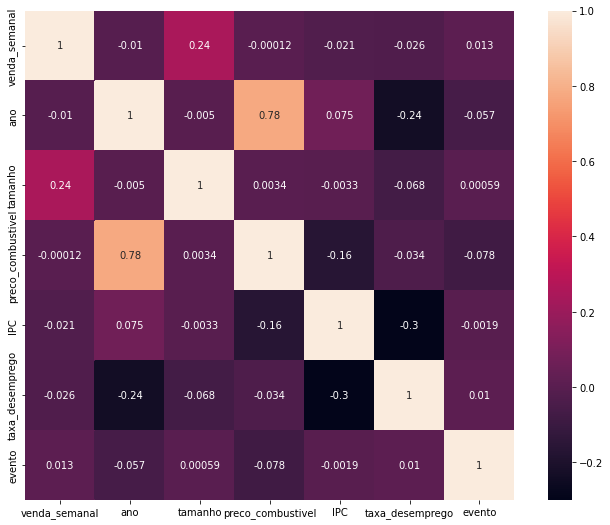

In [ ]:
# Vamos fazer uma a análise de correlação com todos os dados
cor = df_juntos.drop(['loja', 'departamento', 'mes', 'semana'], axis=1)
corrmat = cor.corr()
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True);
# Observa-se que geralmente as lojas maiores possuem maior venda semanal
# O ano e o preço do combustível estão tendo correlação negativa, indicando que o preço do combusível cai ao longo do tempo
# E como já faladp anteriormente, IPC e a taxa de desemprego tiveram uma correlação negativa

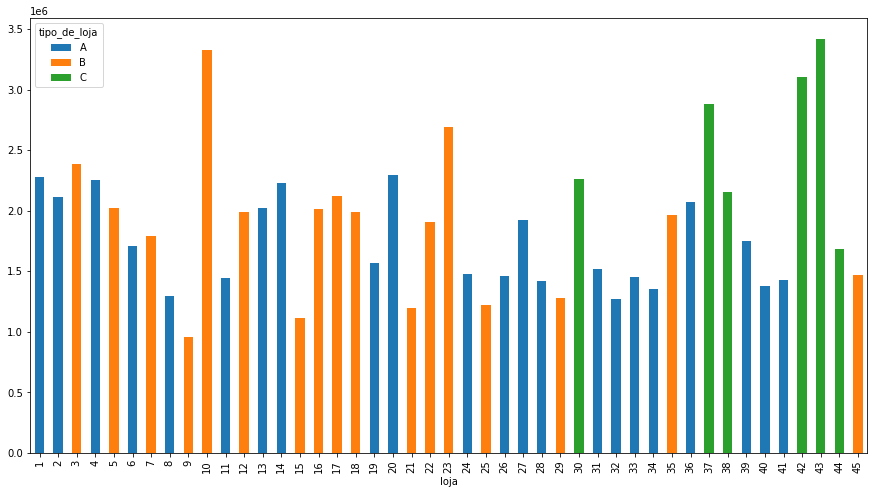

In [ ]:
# dividir a venda pelo tamanho da loja, dessa forma vemos a venda por Square Feet,  M² = 10,764 sq.ft
v_l = df_juntos.groupby(['loja', 'tipo_de_loja'])['venda_semanal'].sum().unstack('tipo_de_loja')
t_l = df_juntos.groupby(['loja', 'tipo_de_loja'])['tamanho'].median().unstack('tipo_de_loja')
v_t= v_l/t_l
v_t.plot(kind='bar', stacked=True, figsize=(15,8))
# vemos nesse caso as lojas do tipo C parecem ter um bom retorno, e as lojas do tipo A e B possuem retorno parecido entre si

In [ ]:
# vemos que em média o tipo de loja C consegue mais vendas pelo espaço que tem
v_t.mean()

tipo_de_loja
A    1.715062e+06
B    1.850232e+06
C    2.584103e+06
dtype: float64

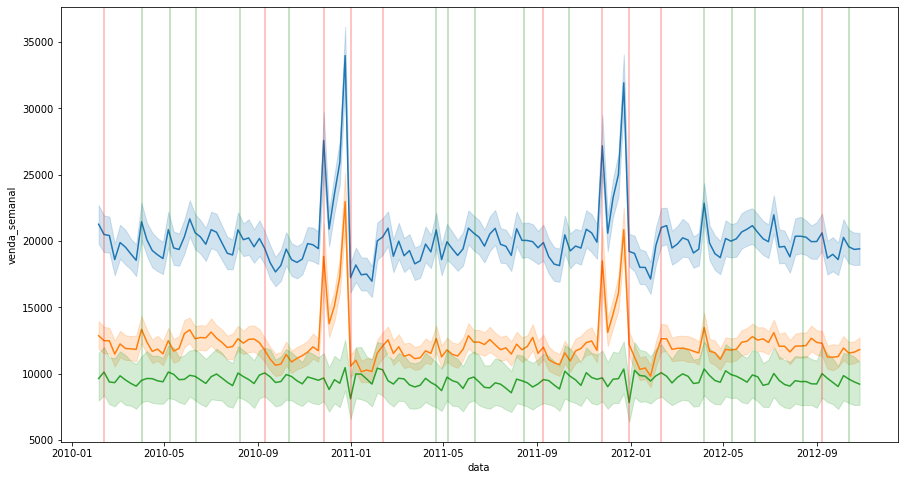

In [ ]:
# OLhando para as vendas semanais segmentando pelos tipos de lojas
plt.subplots(figsize=(15,8))
venda_a = df_juntos[df_juntos['tipo_de_loja']=='A']
sns.lineplot(data = venda_a, x = venda_a['data'], y= venda_a['venda_semanal'])

venda_b = df_juntos[df_juntos['tipo_de_loja']=='B']
sns.lineplot(data = venda_b, x = venda_b['data'], y= venda_b['venda_semanal'])

venda_c = df_juntos[df_juntos['tipo_de_loja']=='C']
sns.lineplot(data = venda_c, x = venda_c['data'], y= venda_c['venda_semanal'])

for i in s:
  plt.axvline(i, alpha=0.3, color='red')

for j in data_esp:
  plt.axvline(j, alpha=0.3, color='g')
plt.show()

# Vemos que as lojas do tipo A e B possuem o formato do gráfico bem parecido
# Já as lojas do grupo C são diferentes e possuem menos variação ao longo do tempo

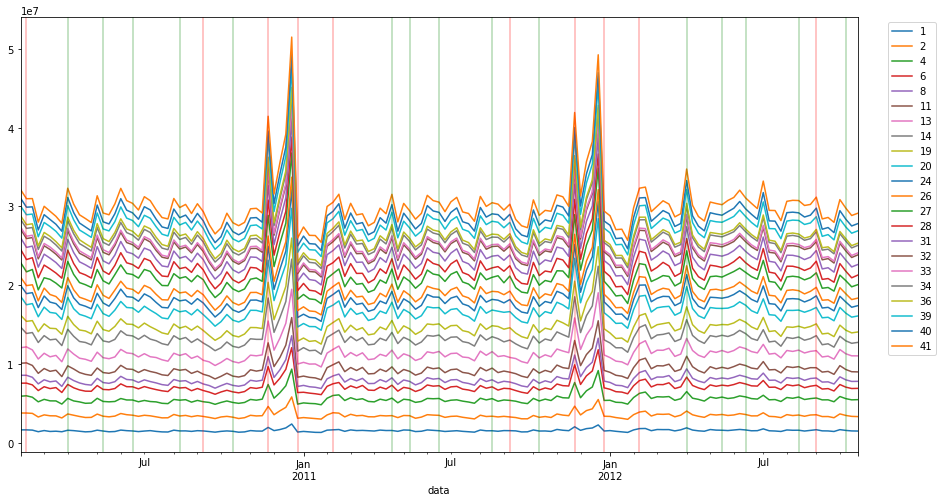

In [ ]:
# Para observar melhor, vamos fazer o gráfico anterior, só que agora apenas com o grupo de loja do tipo A
venda_a = df_juntos[df_juntos['tipo_de_loja']=='A']

data_grouped = venda_a.groupby(['data', 'loja']).sum()['venda_semanal'].unstack('loja')
data_grouped.plot(stacked=True, figsize=(15,8))

for i in s:
  plt.axvline(i, alpha=0.3, color='red')

for j in data_esp:
  plt.axvline(j, alpha=0.3, color='g')
plt.legend(bbox_to_anchor=(1.1, 1)) 
plt.show()

# Vemos que no geral as lojas do grupo A parecem ter uma mesma tendência de vendas

# Lembrando que:
# As linhas vermelhas são as datas de eventos para a A-TECH (Carnaval, feriado de independencia, Black Friday, Natal)
# As linhas verdes são as datas que geralmente são importantes para o comércio (Páscoa, Dia das Mães, Dia dos namorados, Dia dos Pais, Dia das Crianças)

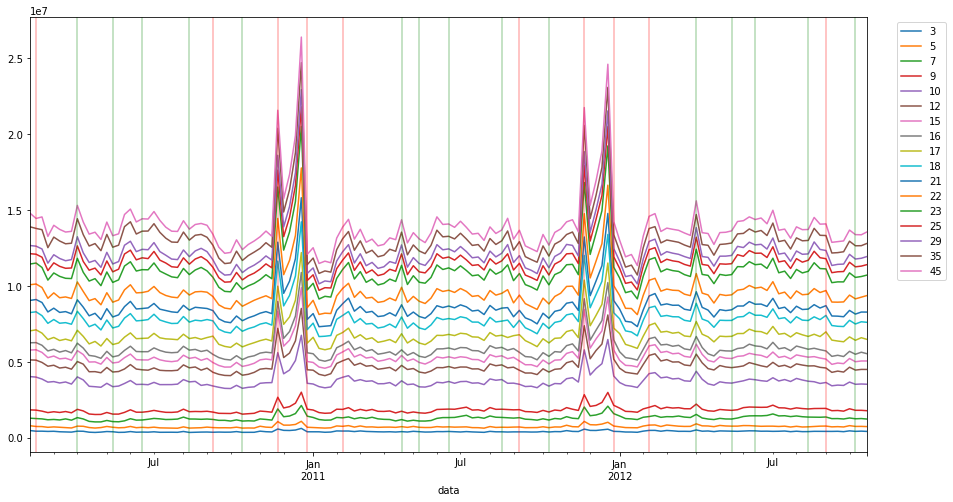

In [ ]:
# agora apenas com o grupo de loja do tipo B
venda_b = df_juntos[df_juntos['tipo_de_loja']=='B']

data_grouped = venda_b.groupby(['data', 'loja']).sum()['venda_semanal'].unstack('loja')
data_grouped.plot(stacked=True, figsize=(15,8))

for i in s:
  plt.axvline(i, alpha=0.3, color='red')

for j in data_esp:
  plt.axvline(j, alpha=0.3, color='g')

plt.legend(bbox_to_anchor=(1.1, 1)) 
plt.show()

# Vemos que no geral as lojas do grupo B parecem ter uma mesma tendência de vendas

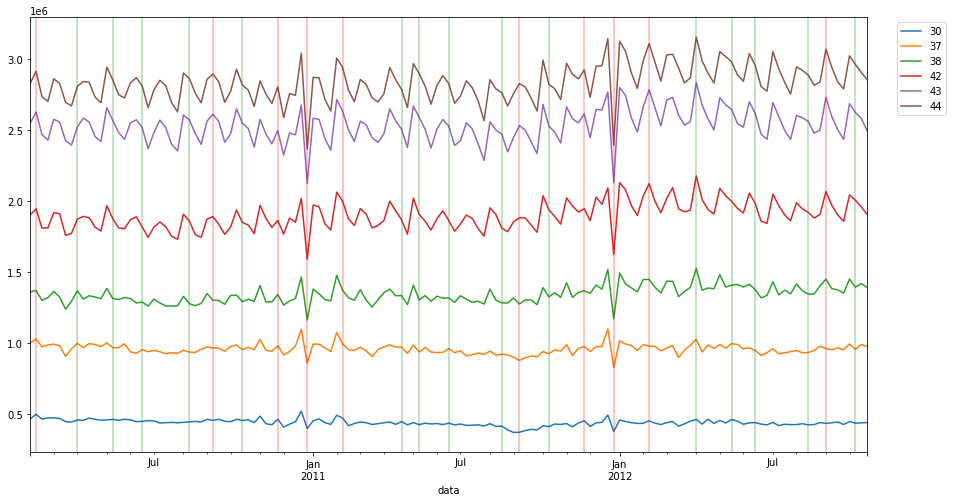

In [ ]:
# agora apenas com o grupo de loja do tipo C
venda_c = df_juntos[df_juntos['tipo_de_loja']=='C']

data_grouped = venda_c.groupby(['data', 'loja']).sum()['venda_semanal'].unstack('loja')
data_grouped.plot(stacked=True, figsize=(15,8))

for i in s:
  plt.axvline(i, alpha=0.3, color='red')

for j in data_esp:
  plt.axvline(j, alpha=0.3, color='g')
plt.legend(bbox_to_anchor=(1.1, 1)) 
plt.show()

# Vemos que no geral as lojas do grupo C parecem ter uma mesma tendência, chama a atenção que as vendas não aumentam muito na black friday e natal
# Essas vendas são bem diferentes das lojas do grupo A e B

### 2.3 Análise dos departamentos
 

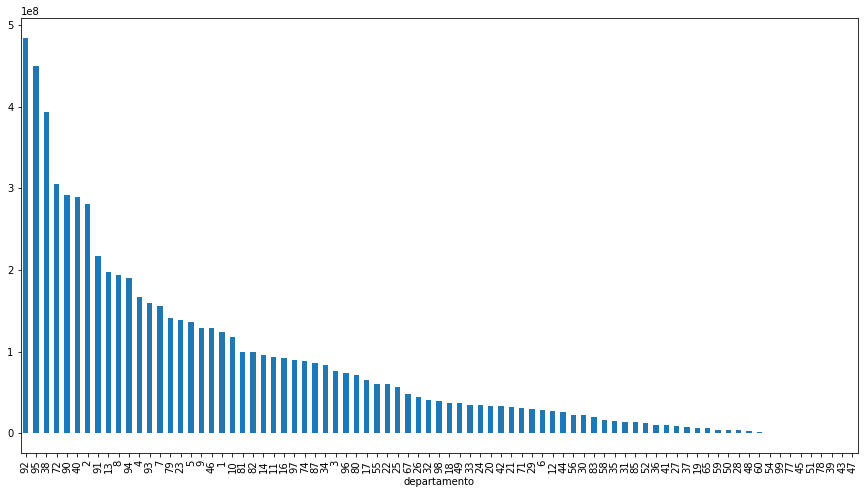

In [ ]:
# vamos ver a média de venda semanal de cada departamento
df_vendas.groupby(['departamento'])['venda_semanal'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
# Vemos que temos alguns departamentos que faria sentido parar de vender, como o departamento 47

In [ ]:
# Vamos ver quais são os departamentos que mais vendem
mais_vende_dp = df_vendas.groupby(['departamento'])['venda_semanal'].sum().sort_values(ascending=False)
mais_vende_dp.head(5)

departamento
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
72    3.057252e+08
90    2.910685e+08
Name: venda_semanal, dtype: float64

In [ ]:
# Vamos ver quais são os departamentos que menos vendem vendem
menos_vende_dp = df_vendas.groupby(['departamento'])['venda_semanal'].sum().sort_values(ascending=True)
menos_vende_dp.head(5)
# Será que é melhor parar de vender esses produtos?

departamento
47    -4962.93
43       14.32
39      177.98
78     1714.71
51    30572.83
Name: venda_semanal, dtype: float64

In [ ]:
# Como são muitos departamentos decidimos analisar conforme Pareto, primeiro analisar o conjunto de departamentos que representam 80% das vendas

# Encontrando o valor da soma de vendas por deparatamento que corresponde a 80% das vendas
pareto = df_vendas.groupby(['departamento'])['venda_semanal'].sum().sort_values(ascending=False)
cont=0
x=0
acumulado=0
total = pareto.sum()
for i in pareto:
    acumulado= acumulado + i
    x= acumulado/total
    print('porcentagem :',x)
    print('venda_depart :',i)
    print('')

porcentagem : 0.07183132132054869
venda_depart : 483943341.87

porcentagem : 0.13852355195453325
venda_depart : 449320162.52

porcentagem : 0.19687376109455587
venda_depart : 393118136.92

porcentagem : 0.24225229974602755
venda_depart : 305725152.21

porcentagem : 0.2854553578976013
venda_depart : 291068463.68

porcentagem : 0.32834189945173625
venda_depart : 288936022.05

porcentagem : 0.3699927905637633
venda_depart : 280611174.43

porcentagem : 0.40216952493216634
venda_depart : 216781705.73

porcentagem : 0.43145780698556635
venda_depart : 197321569.95

porcentagem : 0.46029474713872276
venda_depart : 194280780.73

porcentagem : 0.488483299521145
venda_depart : 189912450.33

porcentagem : 0.513292756642814
venda_depart : 167146745.58

porcentagem : 0.5369967008808659
venda_depart : 159698663.19

porcentagem : 0.5600741105728275
venda_depart : 155477562.75

porcentagem : 0.581061485988489
venda_depart : 141396544.14

porcentagem : 0.6015714814397833
venda_depart : 138180330.78

por

In [ ]:
# Dessa forma encontramos o valor de 88781985.57, os departamentos que vendem mais que isso, somados correspondem a 80% das vendas totais

# salvando em uma variável os departamentos que fazem parte desse grupo mais vende
pareto_index = pareto.index[pareto>88781985.57].tolist()

In [ ]:
# Alguns dados de vendas semanais possuem os dados negativos, provavelmente por conta de troca de produtos, valor transformar os dados negativos em zeros para plotar melhor os gráficos
df_juntos['venda_semanal'][df_juntos['venda_semanal']<0] =0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Vendo os departamentos que fazem parte do grupo que representa 80 % das vendas
for i in pareto_index:
  print('(df_juntos[\'departamento\']=={}) |'.format(i), end="")

(df_juntos['departamento']==92) |(df_juntos['departamento']==95) |(df_juntos['departamento']==38) |(df_juntos['departamento']==72) |(df_juntos['departamento']==90) |(df_juntos['departamento']==40) |(df_juntos['departamento']==2) |(df_juntos['departamento']==91) |(df_juntos['departamento']==13) |(df_juntos['departamento']==8) |(df_juntos['departamento']==94) |(df_juntos['departamento']==4) |(df_juntos['departamento']==93) |(df_juntos['departamento']==7) |(df_juntos['departamento']==79) |(df_juntos['departamento']==23) |(df_juntos['departamento']==5) |(df_juntos['departamento']==9) |(df_juntos['departamento']==46) |(df_juntos['departamento']==1) |(df_juntos['departamento']==10) |(df_juntos['departamento']==81) |(df_juntos['departamento']==82) |(df_juntos['departamento']==14) |(df_juntos['departamento']==11) |(df_juntos['departamento']==16) |(df_juntos['departamento']==97) |

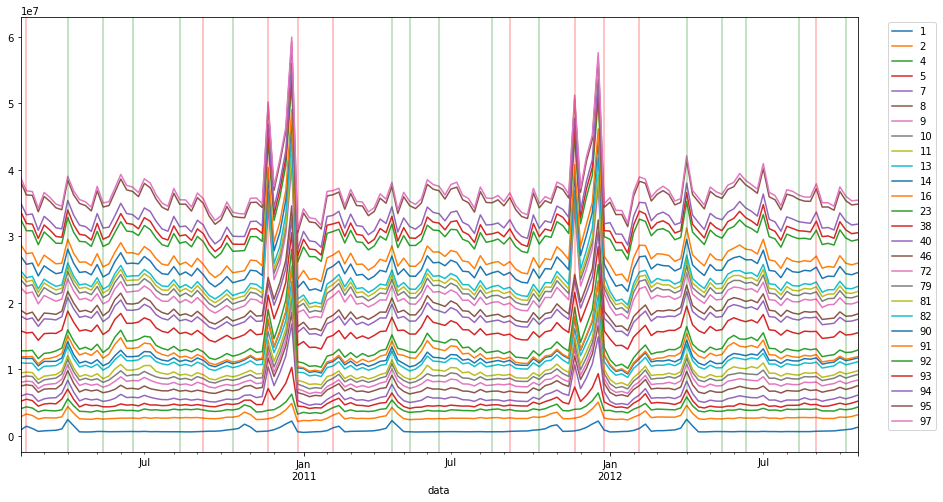

In [ ]:
# Segmentando os dados para aparecer os departamentos que correspondem a 80 % das vendas
selecao =(df_juntos['departamento']==92) |(df_juntos['departamento']==95) |(df_juntos['departamento']==38) |(df_juntos['departamento']==72) |(df_juntos['departamento']==90) |(df_juntos['departamento']==40) |(df_juntos['departamento']==2) |(df_juntos['departamento']==91) |(df_juntos['departamento']==13) |(df_juntos['departamento']==8) |(df_juntos['departamento']==94) |(df_juntos['departamento']==4) |(df_juntos['departamento']==93) |(df_juntos['departamento']==7) |(df_juntos['departamento']==79) |(df_juntos['departamento']==23) |(df_juntos['departamento']==5) |(df_juntos['departamento']==9) |(df_juntos['departamento']==46) |(df_juntos['departamento']==1) |(df_juntos['departamento']==10) |(df_juntos['departamento']==81) |(df_juntos['departamento']==82) |(df_juntos['departamento']==14) |(df_juntos['departamento']==11) |(df_juntos['departamento']==16) |(df_juntos['departamento']==97)
depart_pareto = df_juntos[selecao]

# Plotando os departamentos que correspondem a 80 % das vendas
data_grouped = depart_pareto.groupby(['data', 'departamento']).sum()['venda_semanal'].unstack('departamento')
data_grouped.plot(stacked=True, figsize=(15,8))

for i in s:
  plt.axvline(i, alpha=0.3, color='red')

for j in data_esp:
  plt.axvline(j, alpha=0.3, color='g')
plt.legend( bbox_to_anchor=(1.1, 1)) 
plt.show()

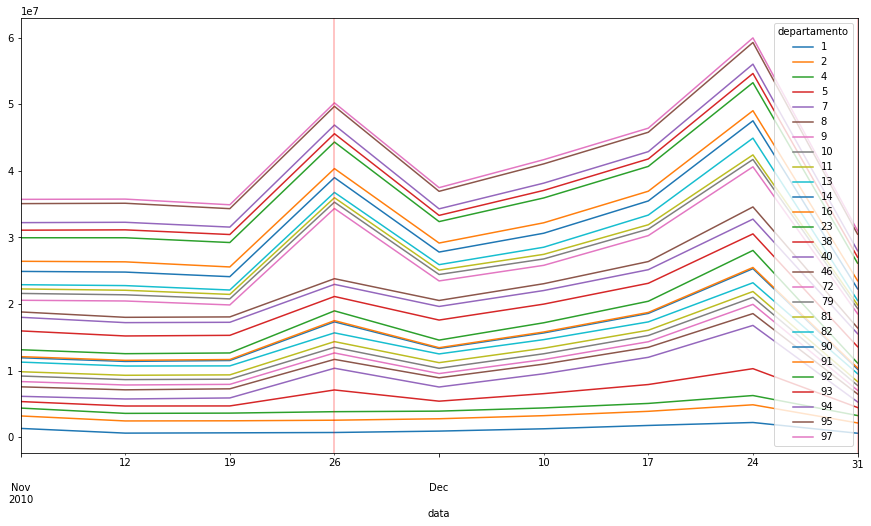

In [ ]:
# Tentar dar um Zoom nessa parte de novembro e dezembro, para ver se os gráficos não se interceptam 

selecao2 =(depart_pareto['ano']==2010) & ((depart_pareto['mes']==11) | (depart_pareto['mes']==12))
depart_pareto_dez= depart_pareto[selecao2]
data_grouped = depart_pareto_dez.groupby(['data', 'departamento']).sum()['venda_semanal'].unstack('departamento')
data_grouped.plot(stacked=True, figsize=(15,8))

for i in s:
  plt.axvline(i, alpha=0.3, color='red')

for j in data_esp:
  plt.axvline(j, alpha=0.3, color='g')
plt.show()

In [ ]:
# Então é possível observar que praticamente não interseção entre linhas, ou seja no geral praticamente não existe troca de quais são os departamentos que vendem mais ao longo do tempo

In [ ]:
# Agora vamos aplicar o mesmo para os departamentos que não são pareto, ou seja, representam 20 % das vendas
nao_pareto_index = pareto.index[pareto<88781985.57].tolist()

# Vendo os departamentos que fazem parte do grupo que representa 20 % das vendas
for i in nao_pareto_index:
  print('(df_juntos[\'departamento\']=={}) |'.format(i), end="")

(df_juntos['departamento']==87) |(df_juntos['departamento']==34) |(df_juntos['departamento']==3) |(df_juntos['departamento']==96) |(df_juntos['departamento']==80) |(df_juntos['departamento']==17) |(df_juntos['departamento']==55) |(df_juntos['departamento']==22) |(df_juntos['departamento']==25) |(df_juntos['departamento']==67) |(df_juntos['departamento']==26) |(df_juntos['departamento']==32) |(df_juntos['departamento']==98) |(df_juntos['departamento']==18) |(df_juntos['departamento']==49) |(df_juntos['departamento']==33) |(df_juntos['departamento']==24) |(df_juntos['departamento']==20) |(df_juntos['departamento']==42) |(df_juntos['departamento']==21) |(df_juntos['departamento']==71) |(df_juntos['departamento']==29) |(df_juntos['departamento']==6) |(df_juntos['departamento']==12) |(df_juntos['departamento']==44) |(df_juntos['departamento']==56) |(df_juntos['departamento']==30) |(df_juntos['departamento']==83) |(df_juntos['departamento']==58) |(df_juntos['departamento']==35) |(df_juntos['

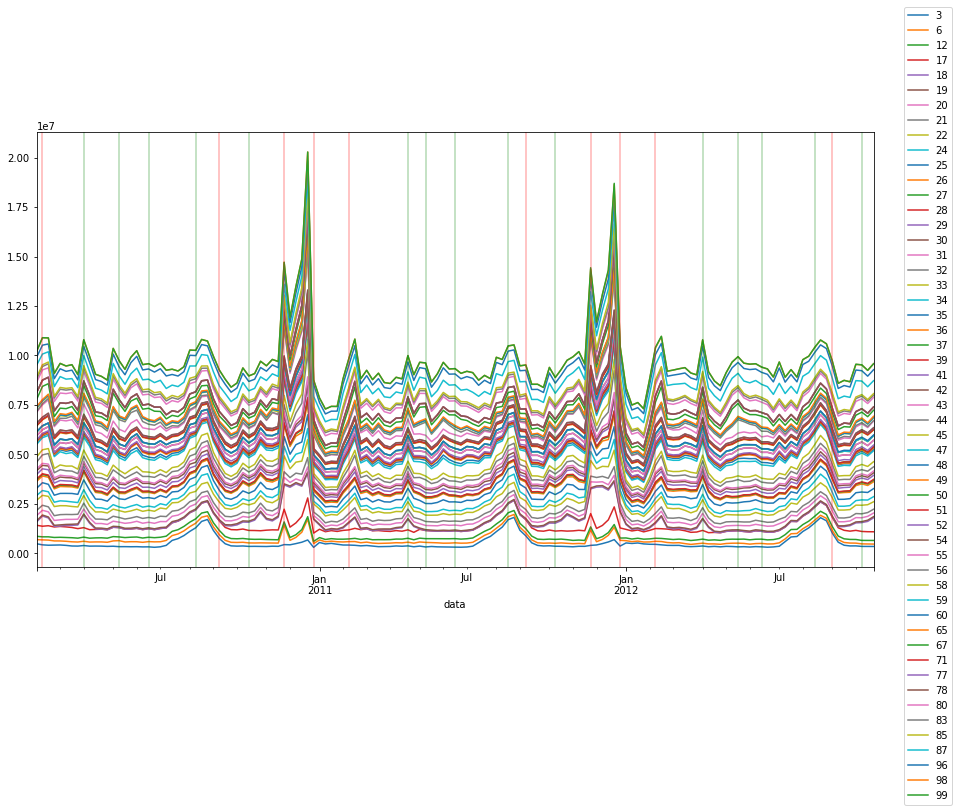

In [ ]:
# Segmentando os dados para aparecer os departamentos que correspondem a 20 % das vendas

selecao =(df_juntos['departamento']==87) |(df_juntos['departamento']==34) |(df_juntos['departamento']==3) |(df_juntos['departamento']==96) |(df_juntos['departamento']==80) |(df_juntos['departamento']==17) |(df_juntos['departamento']==55) |(df_juntos['departamento']==22) |(df_juntos['departamento']==25) |(df_juntos['departamento']==67) |(df_juntos['departamento']==26) |(df_juntos['departamento']==32) |(df_juntos['departamento']==98) |(df_juntos['departamento']==18) |(df_juntos['departamento']==49) |(df_juntos['departamento']==33) |(df_juntos['departamento']==24) |(df_juntos['departamento']==20) |(df_juntos['departamento']==42) |(df_juntos['departamento']==21) |(df_juntos['departamento']==71) |(df_juntos['departamento']==29) |(df_juntos['departamento']==6) |(df_juntos['departamento']==12) |(df_juntos['departamento']==44) |(df_juntos['departamento']==56) |(df_juntos['departamento']==30) |(df_juntos['departamento']==83) |(df_juntos['departamento']==58) |(df_juntos['departamento']==35) |(df_juntos['departamento']==31) |(df_juntos['departamento']==85) |(df_juntos['departamento']==52) |(df_juntos['departamento']==36) |(df_juntos['departamento']==41) |(df_juntos['departamento']==27) |(df_juntos['departamento']==37) |(df_juntos['departamento']==19) |(df_juntos['departamento']==65) |(df_juntos['departamento']==59) |(df_juntos['departamento']==50) |(df_juntos['departamento']==28) |(df_juntos['departamento']==48) |(df_juntos['departamento']==60) |(df_juntos['departamento']==54) |(df_juntos['departamento']==99) |(df_juntos['departamento']==77) |(df_juntos['departamento']==45) |(df_juntos['departamento']==51) |(df_juntos['departamento']==78) |(df_juntos['departamento']==39) |(df_juntos['departamento']==43) |(df_juntos['departamento']==47)
depart_nao_pareto = df_juntos[selecao]

# Plotando os departamentos que correspondem a 20 % das vendas
data_grouped = depart_nao_pareto.groupby(['data', 'departamento']).sum()['venda_semanal'].unstack('departamento')
data_grouped.plot(stacked=True, figsize=(15,8))

for i in s:
  plt.axvline(i, alpha=0.3, color='red')

for j in data_esp:
  plt.axvline(j, alpha=0.3, color='g')
plt.legend(bbox_to_anchor=(1.1, 1.3)) 
plt.show()

# No Geral os departamentos seguem uma tendência de venda
# Mas é interessante observar que os departamentos com menor venda são um pouco diferentes, de final de agosto e inicio de setembro até passam as vendas de finais de ano 

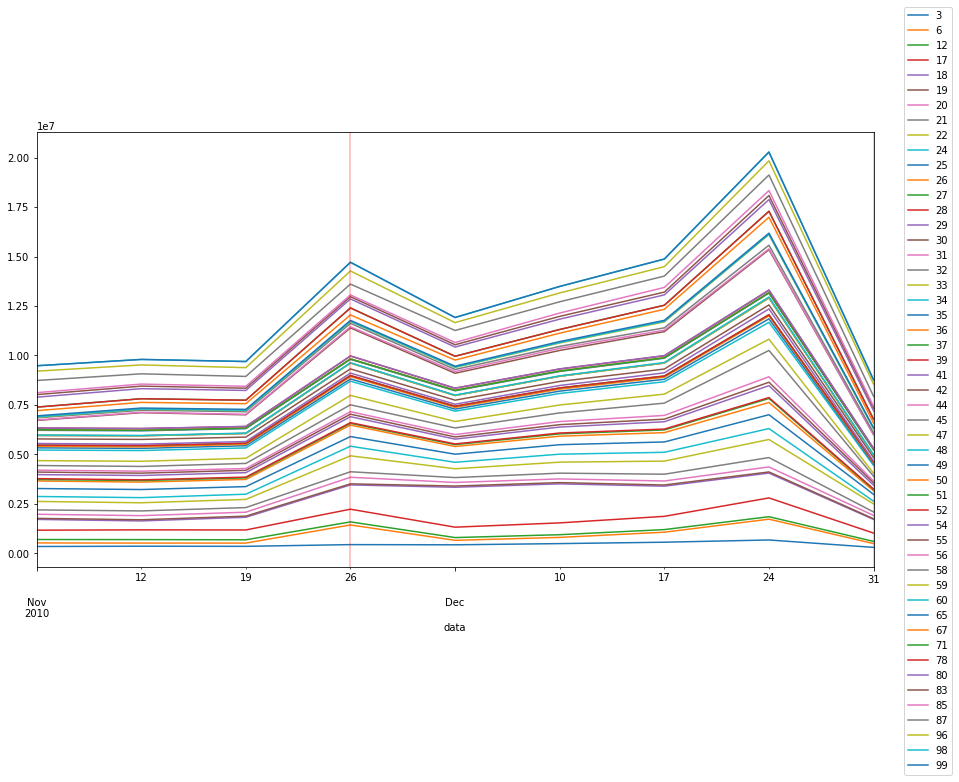

In [ ]:
# Vamos dar um Zoom nessa parte de novembro e dezembro, para ver se os gráficos não se interceptam 

selecao2 =(depart_nao_pareto['ano']==2010) & ((depart_nao_pareto['mes']==11) | (depart_nao_pareto['mes']==12))
depart_nao_pareto_= depart_nao_pareto[selecao2]
data_grouped = depart_nao_pareto_.groupby(['data', 'departamento']).sum()['venda_semanal'].unstack('departamento')
data_grouped.plot(stacked=True, figsize=(15,8))

for i in s:
  plt.axvline(i, alpha=0.3, color='red')

for j in data_esp:
  plt.axvline(j, alpha=0.3, color='g')
plt.legend(bbox_to_anchor=(1.1, 1.3)) 
plt.show()
# praticamente não a interceção entre os gráficos, e seguem uma tendência

In [ ]:
# Vendo quais são os departamentos mais vendidos em cada loja
vd = df_juntos.groupby(['loja','departamento'])['venda_semanal'].sum()
vd2 = vd.reset_index()
vd3 = vd2.sort_values(['venda_semanal', 'loja']).drop_duplicates('loja', keep='last').sort_values('loja')
# renomeando a coluna departamento
vd3 = vd3.rename(columns={'departamento' : 'departamento_+_vendido'})

# Contando os departamentos que são os mais vendidos, o departamento 92 por exemplo é o mais vendido em 19 lojas
vd3['departamento_+_vendido'].value_counts().sort_values(ascending=False)

92    19
38    16
72     4
95     3
2      2
94     1
Name: departamento_+_vendido, dtype: int64

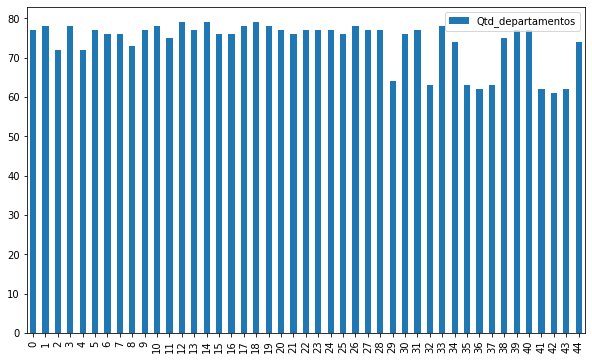

In [ ]:
# Olhando quantos departamentos diferentes nos temos por loja
qtd_depart = []
for i in range(1,46):
  df_qtd_depart = df_juntos[df_juntos['loja'] ==i]
  qtd_depart.append(len(df_qtd_depart.drop_duplicates('departamento', keep='last')))

# Transformando em dataframe 
df_quantidade_dep = pd.DataFrame(qtd_depart)

# renomeando o nome da coluna
df_quantidade_dep = df_quantidade_dep.rename(columns = {0: 'Qtd_departamentos'})

# e plotando o gráfico
df_quantidade_dep.plot(kind='bar', figsize=(10,6))

In [ ]:
# Também foi observado que os departamentos são de 1 até 99, mas não existem ou não tiveram nenhuma venda os seguintes departamentos:
# 15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88 e 89

## 3. Construção da Base de Dados para Clusterização

Nesta etapa o objetivo é tratar as informações previamente carregadas de modo a construir um dataset com as principais variáveis que possivelmente usaremos na clusterização

In [ ]:
# Fazendo a soma das vendas de cada loja no ano de 2010
ano_2010 = df_juntos[df_juntos['ano'] ==2010]
total_venda_2010 = ano_2010.groupby(['loja'])['venda_semanal'].sum()

# Transformando em dataframe e renomeando 
total_venda_2010 = pd.DataFrame(total_venda_2010)
total_venda_2010 = total_venda_2010.rename(columns={'venda_semanal' : 'total_venda_2010'})
#total_venda_2010 = total_venda_2010.reset_index()

In [ ]:
# Fazendo a soma das vendas de cada loja no ano de 2011
ano_2011 = df_juntos[df_juntos['ano'] ==2011]
total_venda_2011 = ano_2011.groupby(['loja'])['venda_semanal'].sum()

# Transformando em dataframe e renomeando 
total_venda_2011 = pd.DataFrame(total_venda_2011)
total_venda_2011 = total_venda_2011.rename(columns={'venda_semanal' : 'total_venda_2011'})
#total_venda_2011 = total_venda_2011.reset_index()

In [ ]:
# Fazendo a soma das vendas de cada loja no ano de 2011 até o mês de outubro
ano_2011_out = df_juntos[(df_juntos['ano'] ==2011) & (df_juntos['mes'] <= 10)]
venda_ate_out_2011= ano_2011_out.groupby(['loja'])['venda_semanal'].sum()

# Transformando em dataframe e renomeando 
venda_ate_out_2011 = pd.DataFrame(venda_ate_out_2011)
venda_ate_out_2011 = venda_ate_out_2011.rename(columns={'venda_semanal' : 'venda_ate_out_2011'})

In [ ]:
# Fazendo a soma das vendas de cada loja no ano de 2012 até o mês de outubro
ano_2012_out = df_juntos[(df_juntos['ano'] ==2012) & (df_juntos['mes'] <= 10)]
venda_ate_out_2012 = ano_2012_out.groupby(['loja'])['venda_semanal'].sum()

# Transformando em dataframe e renomeando 
venda_ate_out_2012 = pd.DataFrame(venda_ate_out_2012)
venda_ate_out_2012 = venda_ate_out_2012.rename(columns={'venda_semanal' : 'venda_ate_out_2012'})

In [ ]:
# Olhando o coeficiente de variação semanal de cada loja
desvio = []
for i in range(1,46):
  desvio_loja = df_juntos[df_juntos['loja'] ==i]
  desvio.append(desvio_loja['venda_semanal'].std(axis=0)/desvio_loja['venda_semanal'].mean())

# Transformando em dataframe e renomeando 
df_std_vendas_sem = pd.DataFrame(desvio)
df_std_vendas_sem = df_std_vendas_sem.rename(columns = {0: 'cv_vendas_semanal'})

In [ ]:
# Olhando o coeficiente de variação semanal de cada loja em que não há semana de evento
desvio_evento = []
for i in range(1,46):
  desvio_loja_evento = df_juntos[(df_juntos['loja'] ==i) & (df_juntos['evento']==False)]
  desvio_evento.append(desvio_loja_evento['venda_semanal'].std(axis=0)/desvio_loja['venda_semanal'].mean())

# Transformando em dataframe e renomeando 
df_std_vendas_sem_evento = pd.DataFrame(desvio_evento)
df_std_vendas_sem_evento = df_std_vendas_sem_evento.rename(columns = {0: 'cv_vendas_sem_evento'})

In [ ]:
# Agrupando as lojas com a média da taxa de desemprego de cada loja
tx_desemprego_loja = df_outras_variaveis.groupby(['loja'])['taxa_desemprego'].mean()

# Transformando em dataframe e renomeando 
df_tx_desemprego_loja = pd.DataFrame(tx_desemprego_loja)
df_tx_desemprego_loja = df_tx_desemprego_loja.rename(columns={'taxa_desemprego' : 'tx_desemprego_loja'})

In [ ]:
# Agrupando as lojas com a média do preço de combustível de cada loja
media_combu_loja = df_outras_variaveis.groupby(['loja'])['preco_combustivel'].mean()

# Transformando em dataframe e renomeando 
df_media_combu_loja = pd.DataFrame(media_combu_loja)
df_media_combu_loja = df_media_combu_loja.rename(columns={'preco_combustivel' : 'media_combu_loja'})

In [ ]:
# Juntando todas as colunas geradas
df_cluster = df_lojas
df_cluster = pd.concat([df_cluster,df_quantidade_dep, df_std_vendas_sem, df_std_vendas_sem_evento], axis=1)

df_cluster = df_cluster.merge(total_venda_2010, how='inner', on='loja')
df_cluster = df_cluster.merge(total_venda_2011, how='inner', on='loja')
df_cluster['diff_vendas_2011_2010'] = df_cluster['total_venda_2011'] - df_cluster['total_venda_2010']

df_cluster = df_cluster.merge(venda_ate_out_2011, how='inner', on='loja')
df_cluster = df_cluster.merge(venda_ate_out_2012, how='inner', on='loja')
df_cluster['diff_vendas_ate_out_2012_2011'] = df_cluster['venda_ate_out_2012'] - df_cluster['venda_ate_out_2011']

df_cluster = df_cluster.merge(df_tx_desemprego_loja, how='inner', on='loja')
df_cluster = df_cluster.merge(df_media_combu_loja, how='inner', on='loja')
df_cluster = df_cluster.merge(vd3[['departamento_+_vendido','loja']], how='inner', on='loja')

df_cluster

loja tipo_de_loja     tamanho  Qtd_departamentos  cv_vendas_semanal  \
0      1            A   97.622581                 77           1.278095   
1      2            A  130.520645                 78           1.229704   
2      3            B   24.123871                 72           2.236090   
3      4            A  132.814839                 78           1.185939   
4      5            B   22.500000                 72           1.596567   
5      6            A  130.648387                 77           1.078478   
6      7            B   45.621290                 76           1.277551   
7      8            A  100.050323                 76           1.152211   
8      9            B   81.182581                 73           1.418693   
9     10            B   81.620645                 77           1.220240   
10    11            A  133.870323                 78           1.057832   
11    12            B   72.411613                 75           1.208452   
12    13            A  141.691613                 79           1.237553   
13    14            A  129.611613                 77           1.282297   
14    15            B   79.830323                 79           1.262069   
15    16            B   36.901290                 76           1.334109   
16    17            B   60.121290                 76           1.258168   
17    18            B   77.840645                 78           1.179416   
18    19            A  131.496129                 79           1.192437   
19    20            A  131.446452                 78           1.208501   
20    21            B   90.430323                 77           1.154787   
21    22            B   77.133548                 76           1.214028   
22    23            B   73.892258                 77           1.056658   
23    24            A  131.496129                 77           1.230001   
24    25            B   82.649677                 77           1.212536   
25    26            A   98.395484                 76           1.381701   
26    27            A  131.731613                 78           1.197031   
27    28            A  133.098065                 77           1.198960   
28    29            B   60.411613                 77           1.252515   
29    30            C   27.734194                 64           1.638965   
30    31            A  131.451613                 76           1.363758   
31    32            A  130.972258                 77           1.278100   
32    33            A   25.606452                 63           1.566516   
33    34            A  102.009032                 78           1.189518   
34    35            B   66.890968                 74           1.326493   
35    36            A   25.748387                 63           1.513838   
36    37            C   25.748387                 62           1.582489   
37    38            C   25.606452                 63           1.699474   
38    39            A  118.780000                 75           1.208221   
39    40            A  100.053548                 77           1.288128   
40    41            A  126.658710                 77           1.270364   
41    42            C   25.606452                 62           1.595491   
42    43            C   26.491613                 61           1.551277   
43    44            C   25.748387                 62           1.756814   
44    45            B   76.271613                 74           1.206826   

    cv_vendas_sem_evento  total_venda_2010  total_venda_2011  \
0               2.364899      7.328045e+07      8.092348e+07   
1               2.810055      9.528209e+07      9.860827e+07   
2               1.220428      1.874553e+07      2.081790e+07   
3               2.929720      9.568137e+07      1.110923e+08   
4               0.682721      1.483613e+07      1.647112e+07   
5               1.984495      7.691317e+07      8.052981e+07   
6               0.877550      2.556817e+07      3.066331e+07   
7               1.283221      4.320473e+0

## 4. Clusterização

Vamos selecionar as variáveis e de fato fazer a clusterização

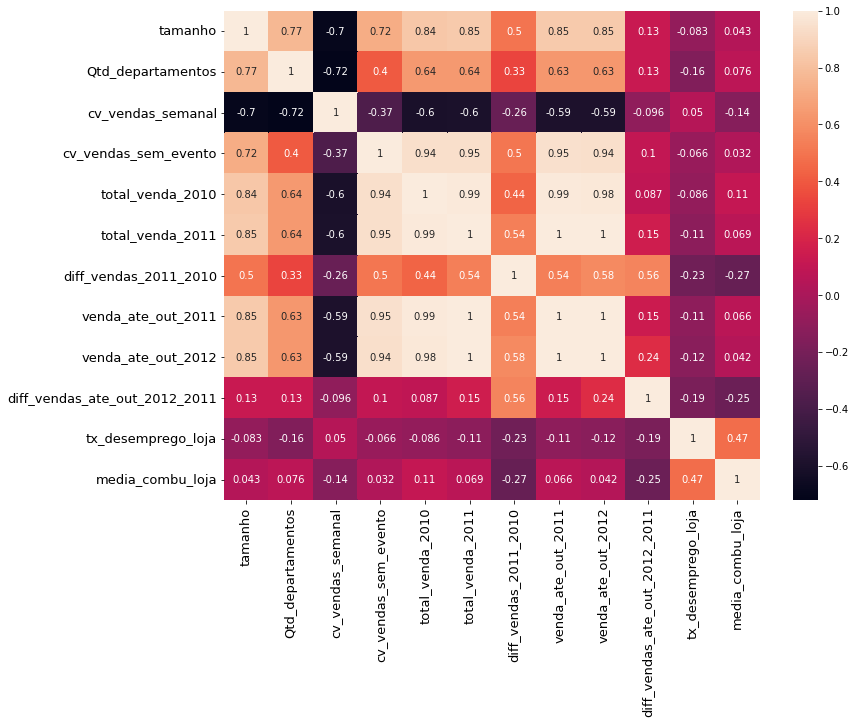

In [ ]:
# Observando a Correlação
cor = df_cluster.drop(['loja', 'departamento_+_vendido'], axis=1)
corrmat = cor.corr()
ax = plt.subplots(figsize=(12, 9))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

sns.heatmap(corrmat, annot=True);
# Vemos que as vendas de 2010, 2011 e 2012, o desvio padrão com e sem evento, o tamanho e a quantidade de departamentos estão muito correlacionados

Seleção das Variáveis

In [ ]:
# Base de lojas simplificada
loja_cluster = df_cluster[['loja','diff_vendas_ate_out_2012_2011','cv_vendas_semanal','tx_desemprego_loja']]

In [ ]:
# Base utilizada para clusterização
var_cluster = ['diff_vendas_ate_out_2012_2011','cv_vendas_semanal','tx_desemprego_loja']

df_var_cluster = loja_cluster[var_cluster]

# Normalização das variáveis

std_data = StandardScaler().fit_transform(df_var_cluster)
df_var_cluster = pd.DataFrame(data=std_data, columns=df_var_cluster.columns, index=df_var_cluster.index)

df_var_cluster.describe()

diff_vendas_ate_out_2012_2011  cv_vendas_semanal  tx_desemprego_loja
count                   4.500000e+01       4.500000e+01        4.500000e+01
mean                    1.541976e-16       2.343804e-16       -5.871846e-16
std                     1.011300e+00       1.011300e+00        1.011300e+00
min                    -4.036304e+00      -1.250983e+00       -1.839333e+00
25%                    -3.073220e-01      -5.625387e-01       -5.934357e-01
50%                    -2.002605e-03      -3.271613e-01       -1.219113e-01
75%                     4.900525e-01       2.391731e-01        3.213242e-01
max                     2.580769e+00       4.156103e+00        2.801809e+00

In [ ]:
# Agora vamos definir o  número de clusters
# Utilizando o método do cotovelo
# O número de iterações é subjetivo, utilizou-se 15, pois temos 45 linhas (um número relativamente pequeno)

wss = {}
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=200, random_state=0)
  kmeans.fit(df_var_cluster)
  wss[k] = kmeans.inertia_

# No código abaixo será gerado o gráfico que permite aplicação do método do "cotovelo"
fig = make_subplots(
    rows=1,
    cols=1,
    subplot_titles=['Método do Cotovelo'],
    shared_xaxes=True,
    shared_yaxes=False)


fig.add_trace(
    go.Scatter(
        x=list(wss.keys()),
        y=list(wss.values()),
        mode='lines+markers',
        textposition='top center',
        showlegend=False),
    row=1, 
    col=1)

fig.update_xaxes(visible=True, title='No. of clusters',row=1, col=1)
fig.update_yaxes(visible=True, title='WSS',row=1, col=1)

fig.update_layout(
  title='Definição do Nº Ideal de Clusters',
  showlegend=True,
  xaxis_showticklabels=True,
  height=400,
  width=800,
  xaxis = dict(
    tickmode = 'linear',
    tick0 = 0,
    dtick = 1))

fig.show()

In [ ]:
# Definição do DF a ser Clusterizado
df_cluster_km = df_var_cluster.copy()

# Aplicando a Clusterização
clus = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=3)
clus.fit(df_cluster_km)

# Ajustando as colunas, colocando a informação do cluster
df_cluster_km.loc[:, 'CLUSTER'] = clus.labels_
df_cluster_km.head()

diff_vendas_ate_out_2012_2011  cv_vendas_semanal  tx_desemprego_loja  \
0                       0.994804          -0.235805           -0.224701   
1                       0.939548          -0.457654           -0.246270   
2                       0.158442           4.156103           -0.478033   
3                       1.660191          -0.658294           -1.269241   
4                      -0.002003           1.224220           -0.968894   

   CLUSTER  
0        1  
1        1  
2        0  
3        1  
4        0

## 5. Análise Clusters

Nesta etapa vamos entender as principais características dos clusters.

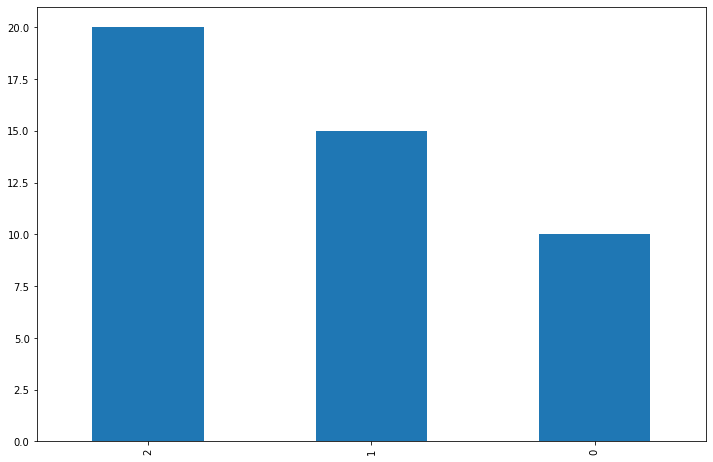

In [ ]:
#Volumetria por Categoricas
df_cluster_km['CLUSTER'].value_counts().plot(kind="bar")
plt.show()
# A maioria das lojas ficou no cluster 2, em seguida o 1 e por último o 0

In [ ]:
# Inserção do cluster na base de lojas
loja_cluster= pd.concat([loja_cluster, df_cluster_km[['CLUSTER']]], axis=1)


In [ ]:
# Analises das variáveis usadas na clusterização em função do Cluster

# Variáveis utilizadas na clusterização
var_cluster = loja_cluster.set_index(['loja', 'CLUSTER']).columns.tolist()

for var in var_cluster:
  fig = px.box(loja_cluster, x=var, y='CLUSTER', points=False)
  fig.update_traces(orientation='h')
  fig.update_layout(
      title=f'Distribuição da {var} por Cluster',
      xaxis={'title': var},
      yaxis={'title': 'Cluster', 'showline': False, 'ticks': ''}
  )

  fig.update_layout(
      width=800,
      height=400,
      showlegend=False)

  fig.show()

In [ ]:
# Coordenadas Paralelas
fig = px.parallel_coordinates(loja_cluster[var_cluster + ['CLUSTER']], color="CLUSTER")
fig.update_layout(
    title={
        'text': "Cluster analysis",
        'y':1
        },
    height=500,
    width=1000)
fig.show()

In [ ]:
# Fazendo um groupby para facilitar ao fazer o próximo gráfico e sabermos os valores médios
analise_grupo_mean = loja_cluster.groupby(['CLUSTER'])[var_cluster].mean().reset_index()
analise_grupo_mean.head()

CLUSTER  diff_vendas_ate_out_2012_2011  cv_vendas_semanal  \
0        0                   6.560939e+05           1.673752   
1        1                   2.753795e+06           1.217510   
2        2                   1.150747e+05           1.241436   

   tx_desemprego_loja  
0            8.110115  
1            6.425403  
2            8.736238

In [ ]:
# Coordenadas Paralelas
fig = px.parallel_coordinates(analise_grupo_mean[var_cluster + ['CLUSTER']], color="CLUSTER")
fig.update_layout(
    title={
        'text': "Cluster analysis",
        'y':1
        },
    height=500,
    width=1000)
fig.show()

## 6. Análise das demais variáveis

Vamos fazer a análise das variáveis não utilizadas na clusterização se comportam em função dos clusters.

In [ ]:
# Adicionando o número do cluster ao dataframe que tinhamos na construção da base de dados
df_cluster = pd.concat([df_cluster, df_cluster_km[['CLUSTER']]], axis=1)

In [ ]:
# Agora vamos avaliar os clusters com base nos dados numéricos da base de dados 
var_cluster = df_cluster.set_index(['loja', 'tipo_de_loja', 'departamento_+_vendido', 'CLUSTER']).columns.tolist()

# Analisando outras variáveis numéricas
for var in var_cluster:
  fig = px.box(df_cluster, x=var, y='CLUSTER', points=False)
  fig.update_traces(orientation='h')
  fig.update_layout(
      title=f'Distribuição da {var} por Cluster',
      xaxis={'title': var},
      yaxis={'title': 'Cluster', 'showline': False, 'ticks': ''}
  )

  fig.update_layout(
      width=800,
      height=400,
      showlegend=False)

  fig.show()

In [ ]:
# Funcão para plotar distribuicao comparativa entre clusters
def plot_wrap_bar(df, coluna, valor, aggfunc, tipo):
  df_plt = df.groupby(['CLUSTER', coluna])[[valor]].agg(aggfunc)
  df_plt.columns=['VALOR']

  df_plt['TOTAL'] = df_plt.groupby(['CLUSTER'])[['VALOR']].transform('sum')
  df_plt['PERCENTUAL'] = round((df_plt['VALOR']/df_plt['TOTAL']),2)

  df_plt = df_plt.reset_index()

  fig = px.bar(df_plt, y="CLUSTER", x=tipo,
              color='CLUSTER', facet_col=coluna,
              facet_col_wrap=3, orientation='h',)
  fig.update_layout(
      title={
          'text': coluna + '-' + valor + '-' + tipo,
          'y':1
          },
      height=500,
      width=800)
      
  fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
  fig.show()

  return df_plt

In [ ]:
# Criando mais uma coluna para auxiliar na contagem das lojas
df_cluster['QTD']= 1

In [ ]:
# plotando um gráfico para vermos como está a distribuição de clusters com o tipo de  lojas
linha = plot_wrap_bar(df_cluster,
              coluna='tipo_de_loja',
              valor='QTD',
              aggfunc='sum',
              tipo='PERCENTUAL')
# Vemos que toda loja do tipo C possui cluster do tipo 0

In [ ]:
# plotando um gráfico para vermos como está a distribuição de clusters com o departamento mais vendido das loja
linha = plot_wrap_bar(df_cluster,
              coluna='departamento_+_vendido',
              valor='QTD',
              aggfunc='sum',
              tipo='PERCENTUAL')

# vemos que o cluster 38 e 92 são os mais vendidos dos 3 clusters

## 7. Bônus - Definindo a meta da A-Tech

Vamos utilizar previsão de vendas da A-Tech para definir a meta de vendas.



In [ ]:
# importando o Prophet
from prophet import Prophet

In [ ]:
# Agrupando o para ter a soma das vendas de cada semana
v_semanais = df_vendas.groupby(['data'])['venda_semanal'].sum()
# Transformando em dataframe e renomeando 
df_v_semanais = pd.DataFrame(v_semanais)
df_v_semanais = df_v_semanais.reset_index()

# Devemos renomear as colunas pois o algoritmo do Prophet entende se estiver a coluna data nomeada como 'ds', e o valor que se deseja prever como "y"
df_v_semanais = df_v_semanais.rename(columns={'data' : 'ds', 'venda_semanal': 'y'})

In [ ]:
# Dessa forma no arquivo fica dessa maneira
df_v_semanais

ds            y
0   2010-02-05  49750740.50
1   2010-02-12  48336677.63
2   2010-02-19  48276993.78
3   2010-02-26  43968571.13
4   2010-03-05  46871470.30
..         ...          ...
138 2012-09-28  43734899.40
139 2012-10-05  47566639.31
140 2012-10-12  46128514.25
141 2012-10-19  45122410.57
142 2012-10-26  45544116.29

[143 rows x 2 columns]

In [ ]:
# dividindo em treino e teste
treino= df_v_semanais.loc[0:116]
teste = df_v_semanais.loc[117:]

In [ ]:
# Criando o modelo
np.random.seed()
modelo = Prophet()

# Ajustando o modelo aos dados
modelo.fit(treino)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3tulxb5g/pw_rhqz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3tulxb5g/9lvdte0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79510', 'data', 'file=/tmp/tmp3tulxb5g/pw_rhqz9.json', 'init=/tmp/tmp3tulxb5g/9lvdte0e.json', 'output', 'file=/tmp/tmp3tulxb5g/prophet_model7p_zgrgg/prophet_model-20221008032835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:28:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:28:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criando dataframe com os períodos futuros para as previsões, vamos fazer a previsão semanal para 26 semanas, ou seja, aproximadamente 6 meses
futuro = modelo.make_future_dataframe(periods= 26, freq = '7d')

In [ ]:
# Realizando as previsões
previsao= modelo.predict(futuro)

In [ ]:
# Agora podemos ver a nossa previsão
previsao.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2010-02-05  4.706049e+07  4.290823e+07  5.262976e+07  4.706049e+07   
1 2010-02-12  4.706273e+07  4.394439e+07  5.341428e+07  4.706273e+07   
2 2010-02-19  4.706497e+07  4.215869e+07  5.195755e+07  4.706497e+07   
3 2010-02-26  4.706721e+07  4.113151e+07  5.102825e+07  4.706721e+07   
4 2010-03-05  4.706945e+07  4.108947e+07  5.081020e+07  4.706945e+07   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  4.706049e+07    7.829700e+05          7.829700e+05          7.829700e+05   
1  4.706273e+07    1.403489e+06          1.403489e+06          1.403489e+06   
2  4.706497e+07    5.998048e+04          5.998048e+04          5.998048e+04   
3  4.706721e+07   -1.038564e+06         -1.038564e+06         -1.038564e+06   
4  4.706945e+07   -1.275766e+06         -1.275766e+06         -1.275766e+06   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  7.829700e+05  7.829700e+05  7.829700e+05                   0.0   
1  1.403489e+06  1.403489e+06  1.403489e+06                   0.0   
2  5.998048e+04  5.998048e+04  5.998048e+04                   0.0   
3 -1.038564e+06 -1.038564e+06 -1.038564e+06                   0.0   
4 -1.275766e+06 -1.275766e+06 -1.275766e+06                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  4.784346e+07  
1                         0.0                         0.0  4.846622e+07  
2                         0.0                         0.0  4.712495e+07  
3                         0.0                         0.0  4.602865e+07  
4                         0.0                         0.0  4.579369e+07

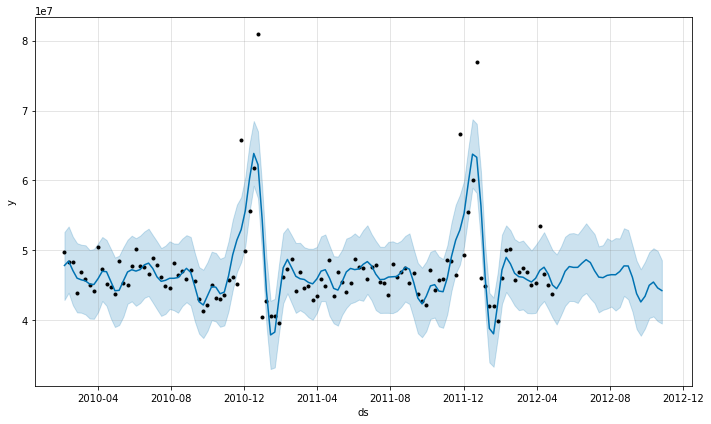

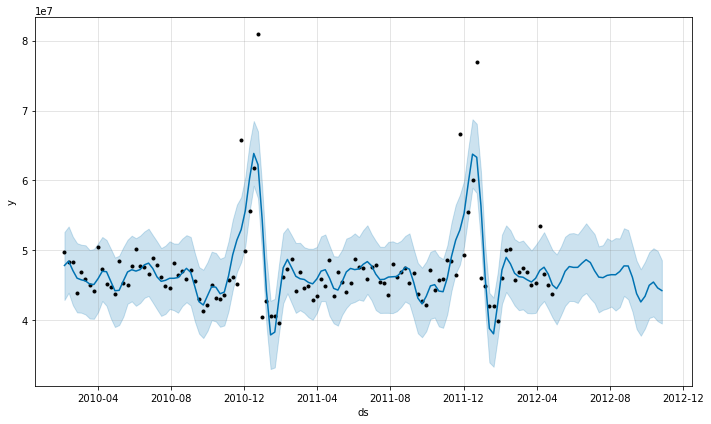

In [ ]:
# plotando o gráfico de previsão
modelo.plot(previsao)

In [ ]:
data_previsao =previsao[['ds', 'yhat']]
df_previsao = data_previsao.merge(teste, how='inner', on='ds')

In [ ]:
# Para avaliar o modelo e sabermos se de fato poderia ser usado, criamos uma baseline.
# A nossa baseline é usar o ano anterior para prever o atual. 

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

y_true = df_previsao['y']
y_pred = df_previsao['yhat']
mean_absolute_percentage_error(y_true, y_pred)

0.023923318477100323

In [ ]:
# Então vemos que usando o Prophet temos um erro MAPE de cerca de 2 %

In [ ]:
# Criando mais colunas para 
treino['ano'] = treino['ds'].dt.year
treino['mes'] = treino['ds'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Deixando um arquivo de dados só com as datas e vendas do período que queremos
baseline_2011 = treino[(treino['ano']==2011 )&(treino['mes']>4)&(treino['mes']<11)]

In [ ]:
# Utilizando o valor real do ano de 2012
y_true = df_previsao['y']
# Utilizando o valor de 2011 para prever 2012
y_pred = baseline_2011['y']
mean_absolute_percentage_error(y_true, y_pred)

0.024987587164827924

In [ ]:
# Então vemos que usando o ano anterior para prever o atual temos um erro MAPE de cerca de 2,5 %

In [ ]:
# Então vemos que o modelo está melhor que a baseline, portanto podemos usar para nossa previsão de vendas

In [ ]:
# Criando o modelo
modelo = Prophet()

# Ajustando o modelo aos dados 
modelo.fit(df_v_semanais)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3tulxb5g/fxpta1nr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3tulxb5g/7ay26wob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54292', 'data', 'file=/tmp/tmp3tulxb5g/fxpta1nr.json', 'init=/tmp/tmp3tulxb5g/7ay26wob.json', 'output', 'file=/tmp/tmp3tulxb5g/prophet_model3cbm5deu/prophet_model-20221008032838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:28:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:28:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criando dataframe com os períodos futuros para as previsões, vamos fazer a previsão semanal para 26 semanas, ou seja, aproximadamente 6 meses
futuro = modelo.make_future_dataframe(periods= 26, freq = '7d')

In [ ]:
# Realizando as previsões
previsao= modelo.predict(futuro)

In [ ]:
# Agora podemos ver a nossa previsão
previsao.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2010-02-05  4.703184e+07  4.331225e+07  5.181776e+07  4.703184e+07   
1 2010-02-12  4.703320e+07  4.367356e+07  5.287018e+07  4.703320e+07   
2 2010-02-19  4.703457e+07  4.261121e+07  5.136068e+07  4.703457e+07   
3 2010-02-26  4.703593e+07  4.123779e+07  5.058158e+07  4.703593e+07   
4 2010-03-05  4.703730e+07  4.114087e+07  5.037401e+07  4.703730e+07   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  4.703184e+07    7.092571e+05          7.092571e+05          7.092571e+05   
1  4.703320e+07    1.426243e+06          1.426243e+06          1.426243e+06   
2  4.703457e+07    4.985145e+04          4.985145e+04          4.985145e+04   
3  4.703593e+07   -1.165592e+06         -1.165592e+06         -1.165592e+06   
4  4.703730e+07   -1.442220e+06         -1.442220e+06         -1.442220e+06   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  7.092571e+05  7.092571e+05  7.092571e+05                   0.0   
1  1.426243e+06  1.426243e+06  1.426243e+06                   0.0   
2  4.985145e+04  4.985145e+04  4.985145e+04                   0.0   
3 -1.165592e+06 -1.165592e+06 -1.165592e+06                   0.0   
4 -1.442220e+06 -1.442220e+06 -1.442220e+06                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  4.774109e+07  
1                         0.0                         0.0  4.845944e+07  
2                         0.0                         0.0  4.708442e+07  
3                         0.0                         0.0  4.587034e+07  
4                         0.0                         0.0  4.559508e+07

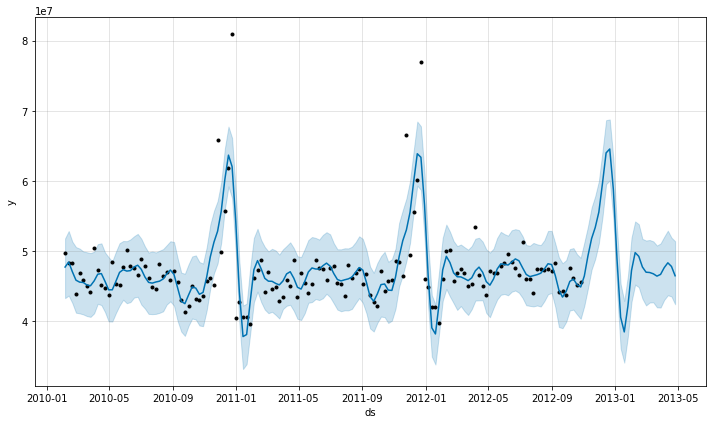

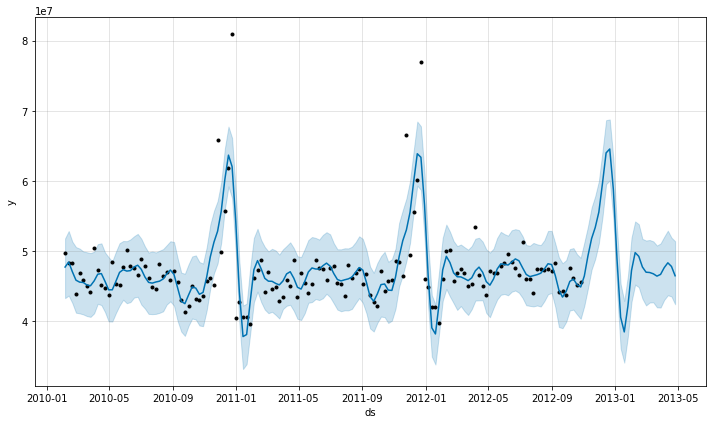

In [ ]:
# plotando o gráfico de previsão
modelo.plot(previsao)

In [ ]:
# agora vamos juntar o arquivo da previsão com o arquivo que usamos para prever
data_previsao =previsao[['ds', 'yhat']]
df_previsao = data_previsao.merge(df_v_semanais, how='left', on='ds')

In [ ]:
# Adicionando coluna com o mes e o ano das datas
df_previsao['ano'] = df_previsao['ds'].dt.year
df_previsao['mes'] = df_previsao['ds'].dt.month

In [ ]:
# Assim podemos comparar o valor real com o da previsão, lembrando que o temos o valor real só até outubro de 2012
# Valor Real
df_previsao.groupby(['ano'])['y'].sum()

ano
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
2013    0.000000e+00
Name: y, dtype: float64

In [ ]:
# Este é o valor da previsão
# Vemos que os valores de 2010 e 2011 estão bem parecidos com o real, fica ruim compara com 2012 pois no dado real só temos até outubro 
df_previsao.groupby(['ano'])['yhat'].sum()

ano
2010    2.284752e+09
2011    2.462754e+09
2012    2.494268e+09
2013    7.884269e+08
Name: yhat, dtype: float64

In [ ]:
# Assim temos que a previsão para os próximos meses é a seguinte
nossa_previsao = df_previsao[((df_previsao['ano']==2012 )&(df_previsao['mes']>10)) | (df_previsao['ano']>2012)]

nossa_previsao.groupby(['ano', 'mes']).sum()['yhat']

ano   mes
2012  11     2.565418e+08
      12     2.470199e+08
2013  1      1.701157e+08
      2      1.940795e+08
      3      2.338980e+08
      4      1.903338e+08
Name: yhat, dtype: float64

In [ ]:
# dessa forma podemos definir que essa é a nossa meta de vendas da empresa

In [ ]:
# E com nossas sugestões nos clusters esperamos superar essa previsão